In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv(r"../../data/final/milk2labels/processed_train.csv")
df_test = pd.read_csv(r"../../data/final/milk2labels/processed_test.csv")

In [3]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Creatinine', 'HDLCholesterol', 'Triglycerides',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'milk_consumption', 'label',
       'YearStart', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [4]:
columns_remove = [
    'VitaminD',
    'YearStart',
]

In [5]:
df_train['label'].value_counts()

label
1.0    11270
0.0     6088
2.0      283
Name: count, dtype: int64

In [6]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Creatinine', 'HDLCholesterol', 'Triglycerides',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'milk_consumption', 'label',
       'YearStart', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [7]:
df_train.drop(columns=columns_remove, inplace=True)
df_test.drop(columns=columns_remove, inplace=True)

In [9]:
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 2 else x)
df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 2 else x)

In [10]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Creatinine', 'HDLCholesterol', 'Triglycerides',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'milk_consumption', 'label', 'Race_1.0',
       'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [11]:
df_train.iloc[:,:12].describe()

,Gender,Age,BMI,WaistCircumference,UricAcid,ALT,AST,AlkalinePhosphotase,Creatinine,HDLCholesterol,Triglycerides,LDLCholesterol
count,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000,17641.000000
mean,1.517318,41.059237,27.248592,93.769577,269.071699,22.377360,23.535400,77.946658,0.844348,1.384682,1.292328,2.834877
std,0.499714,21.254247,6.028528,15.885474,135.187862,11.043269,6.488731,38.162762,0.217638,0.361026,0.788546,0.876251
min,1.000000,12.000000,13.300000,52.000000,2.133000,5.000000,7.000000,9.000000,0.300000,0.260000,0.102000,0.440000
25%,1.000000,20.000000,22.780000,81.400000,220.100000,15.000000,19.000000,55.000000,0.700000,1.110000,0.734000,2.198000
50%,2.000000,39.000000,26.520000,93.200000,291.500000,19.000000,22.000000,69.000000,0.800000,1.340000,1.073000,2.767000
75%,2.000000,59.000000,30.780000,104.500000,356.900000,26.000000,26.000000,87.000000,0.990000,1.600000,1.614000,3.390000
max,2.000000,85.000000,48.220000,142.900000,678.100000,101.000000,55.000000,267.000000,2.010000,2.560000,5.069000,5.612000


In [12]:
df_train = df_train[df_train['milk_consumption']<=3]
df_test = df_test[df_test['milk_consumption']<=3]

In [13]:
category_columns = [
    'Gender', 'Race_1.0',
    'Race_3.0', 'Race_4.0',
    'Race_5.0', 'label','milk_consumption','UricAcid'
]

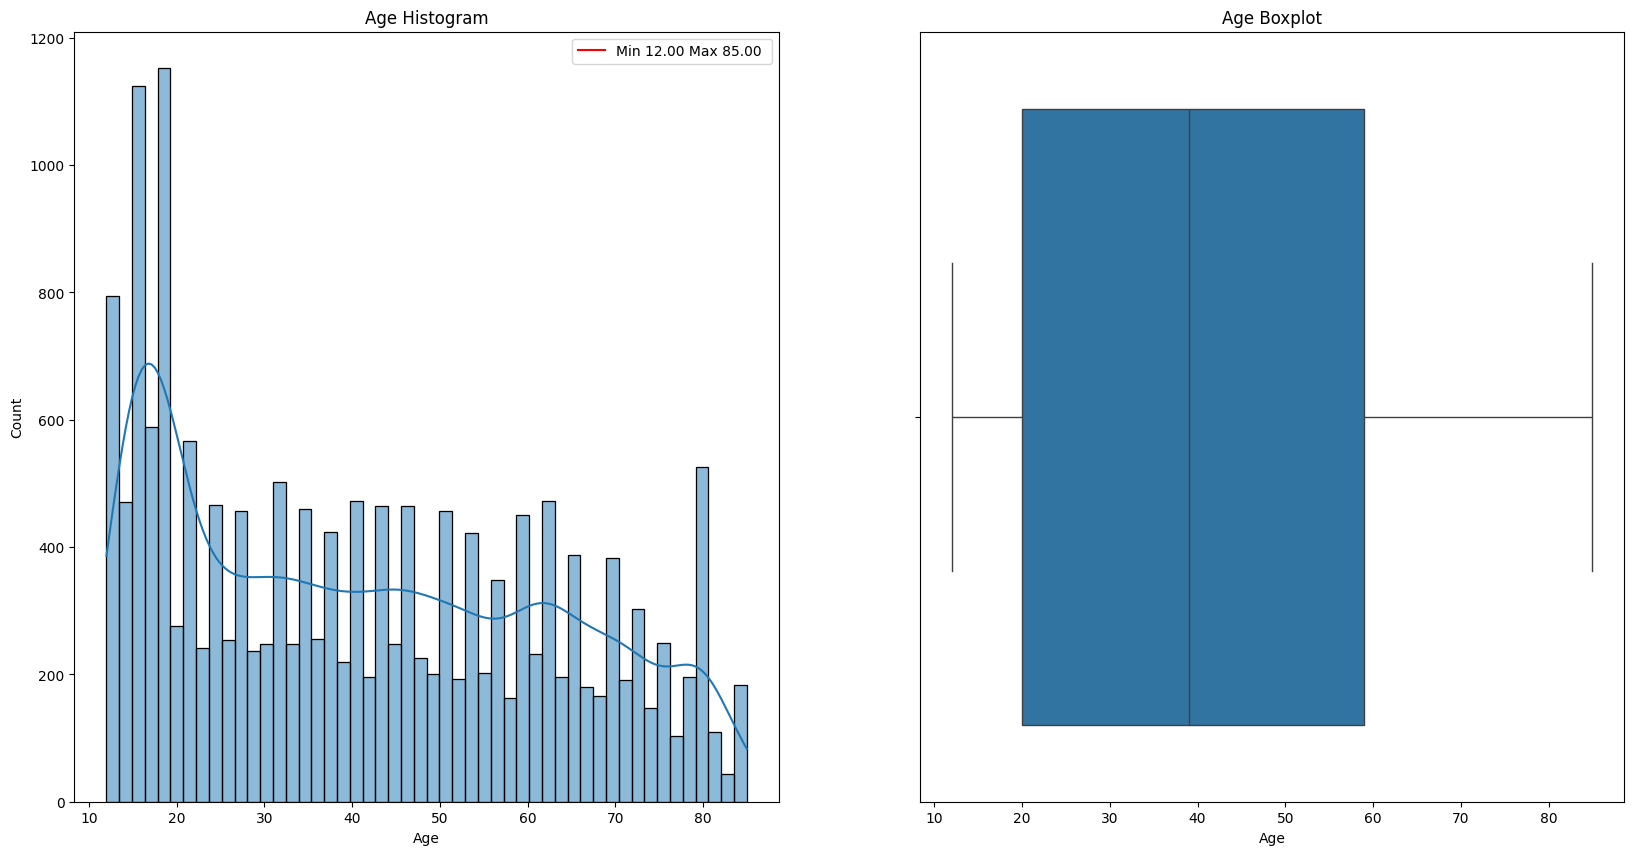

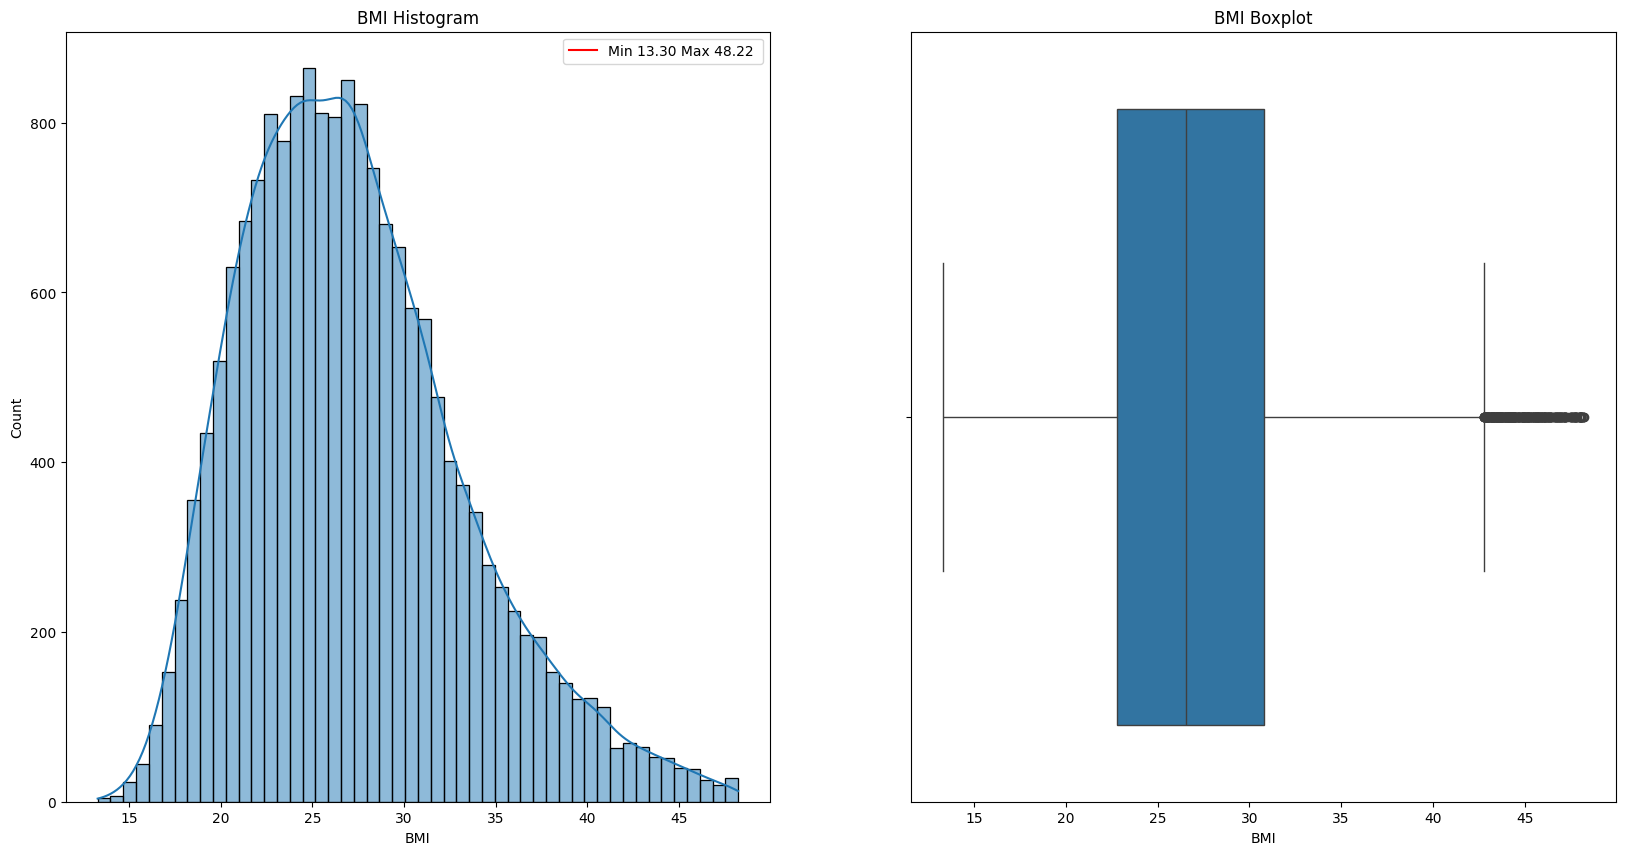

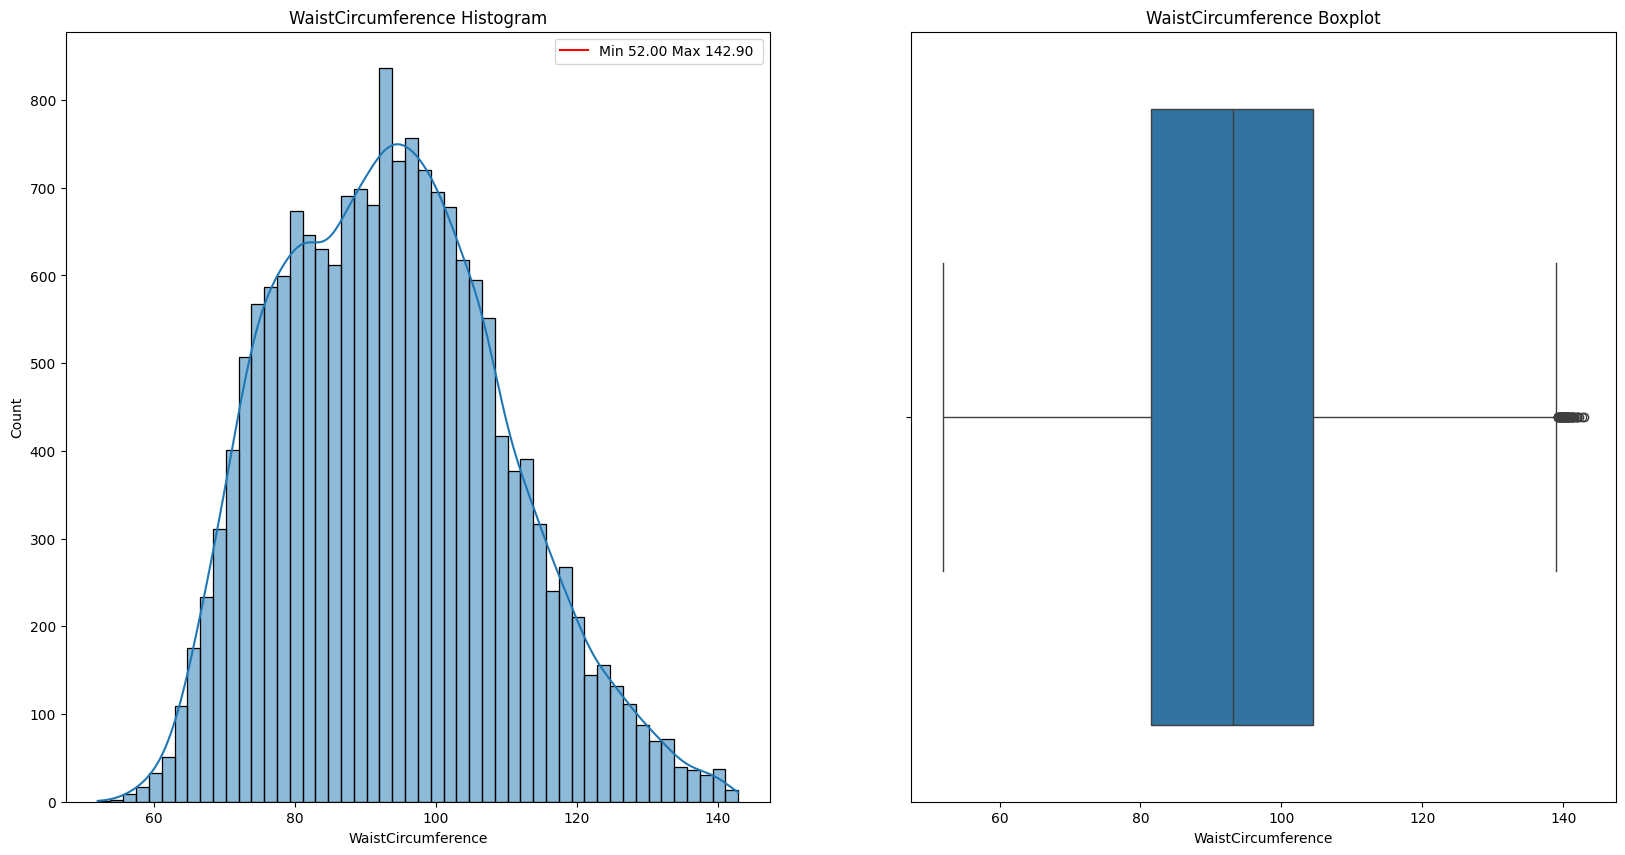

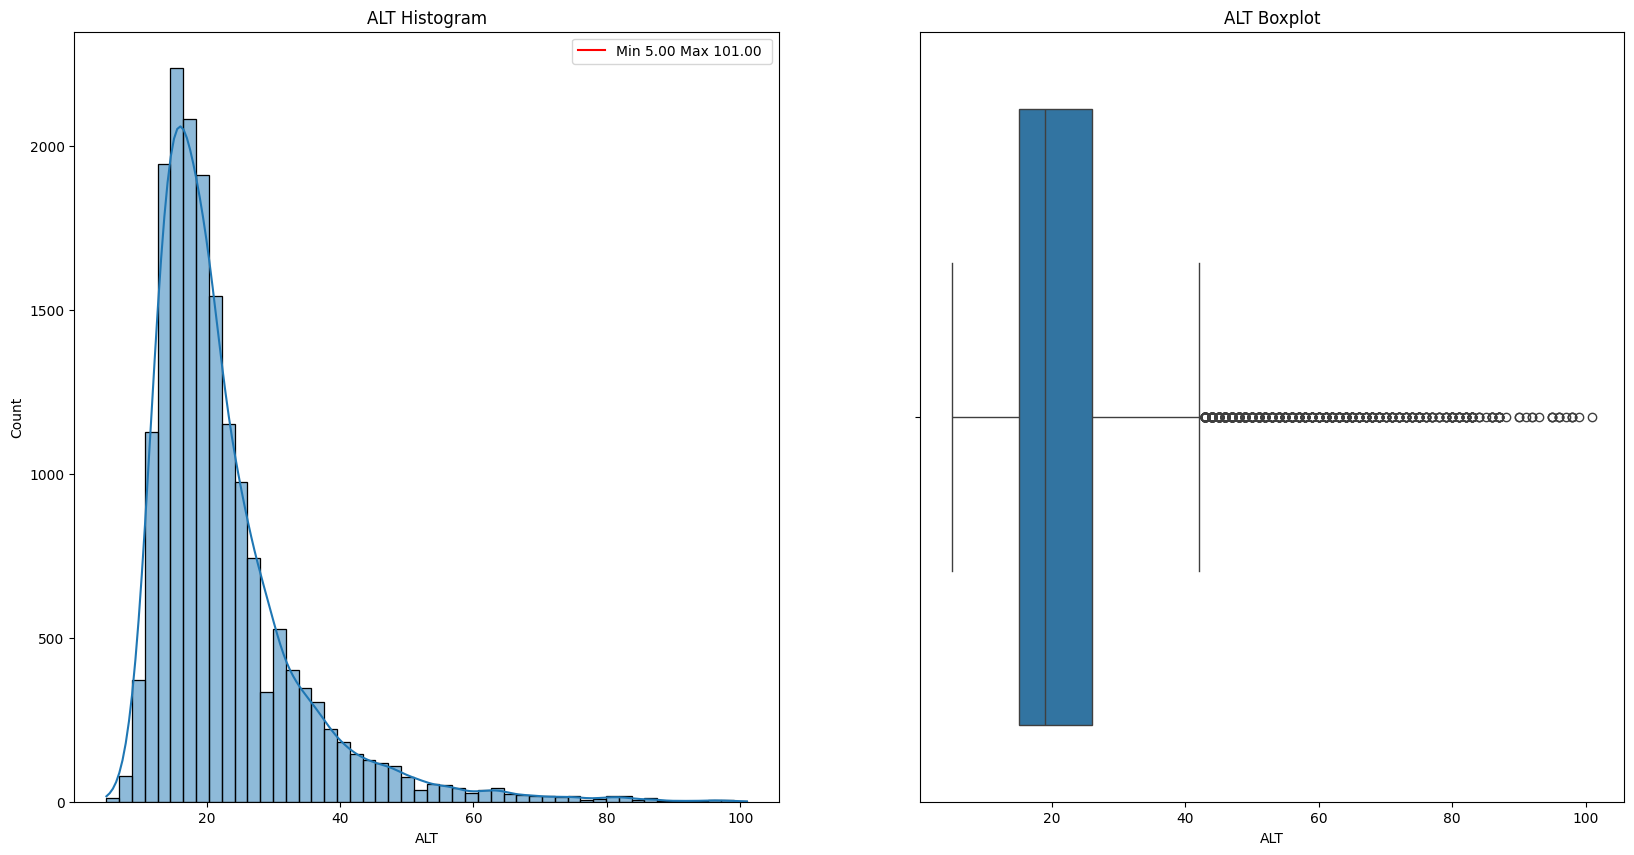

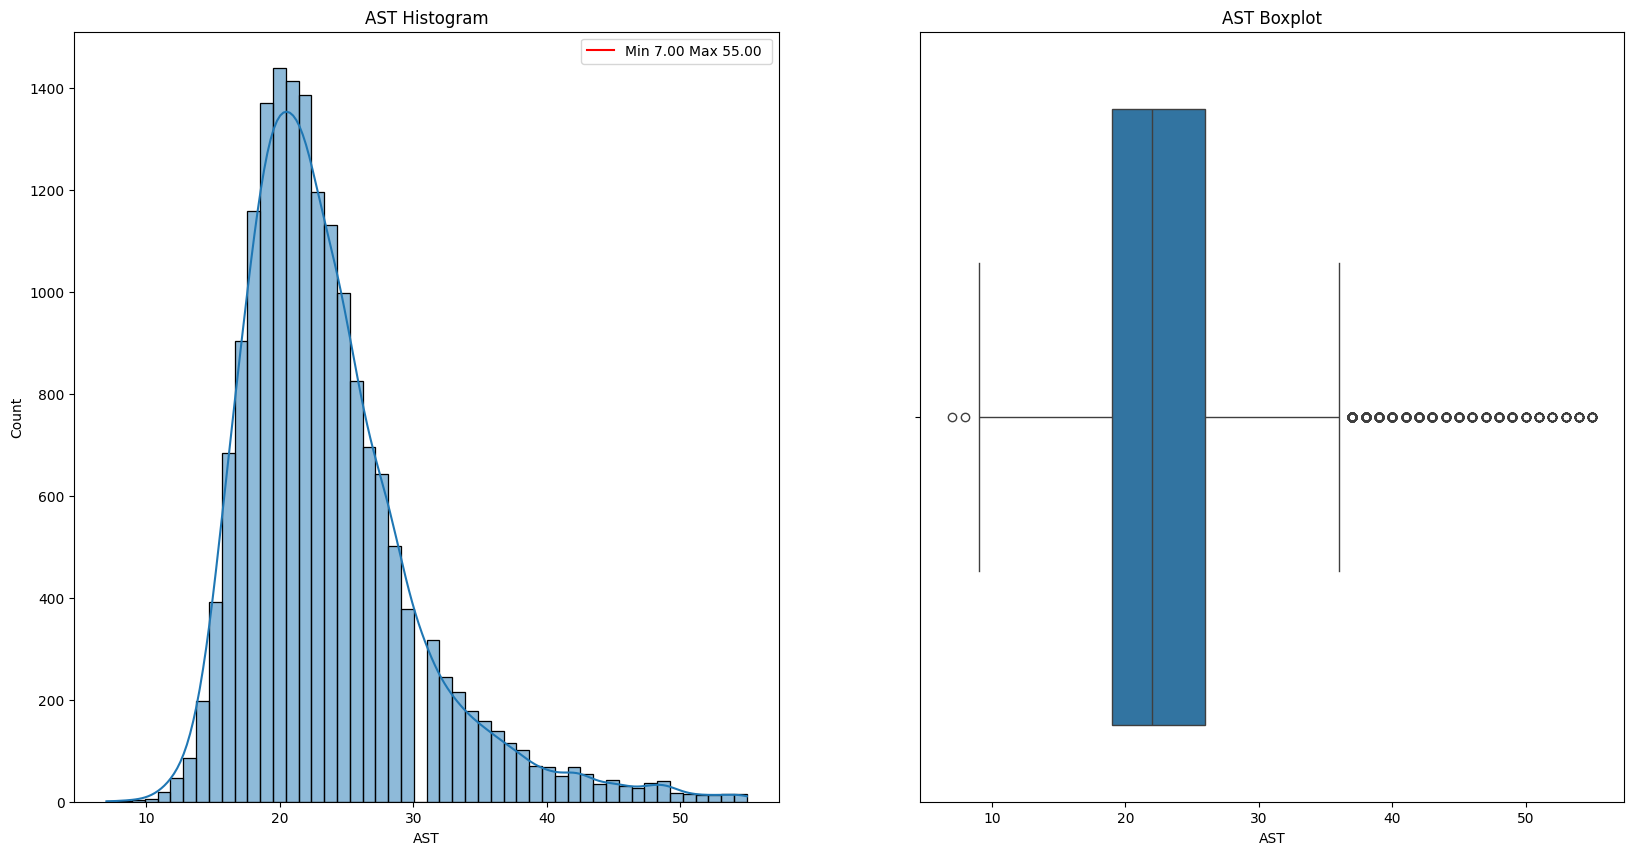

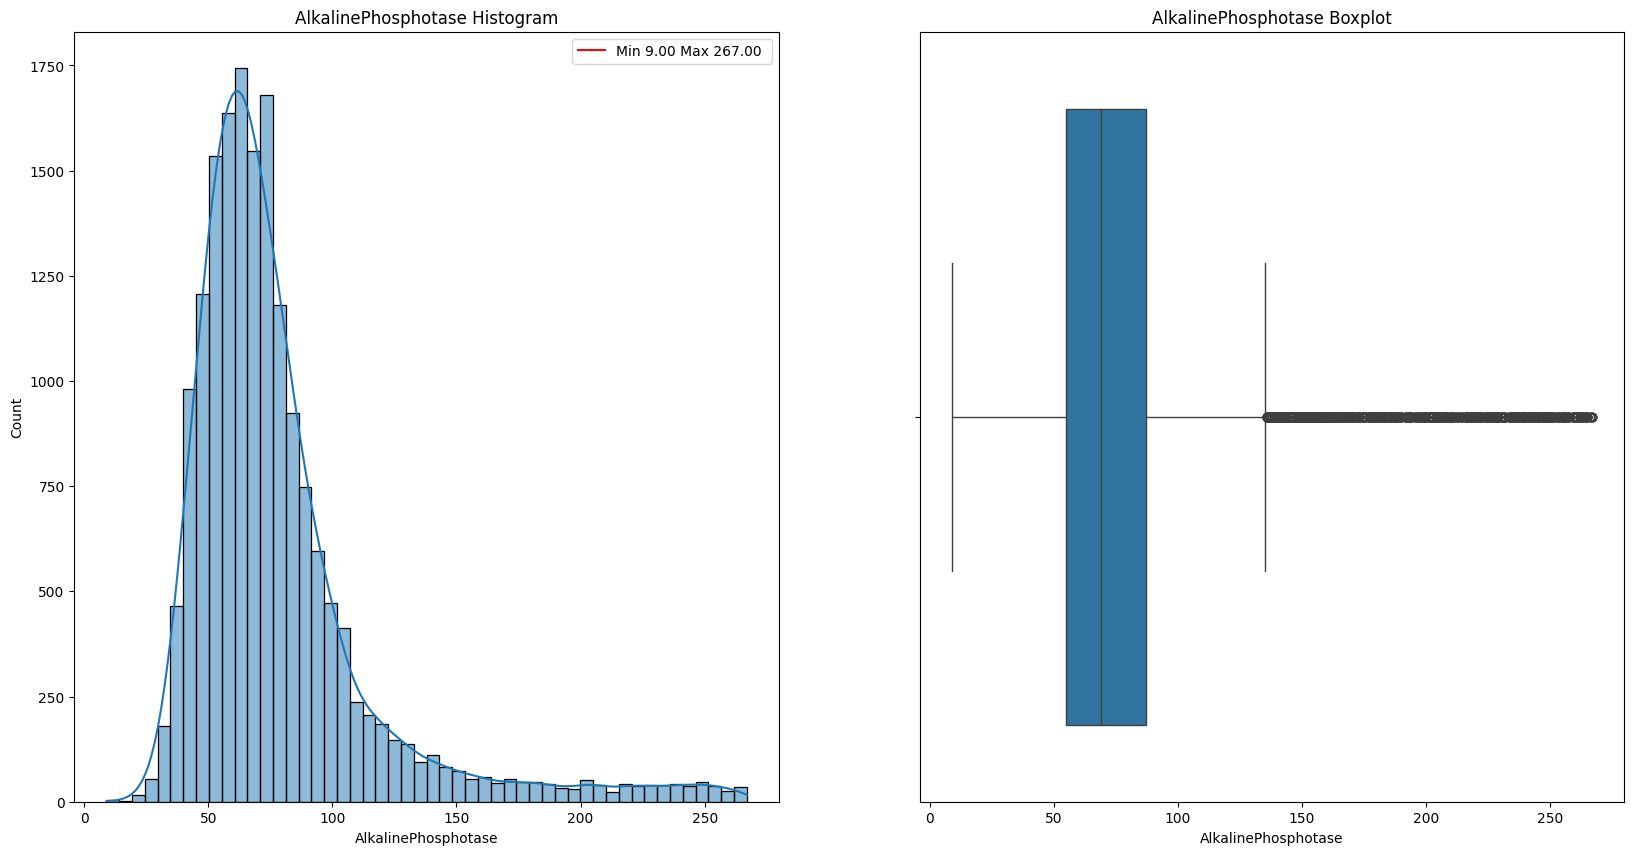

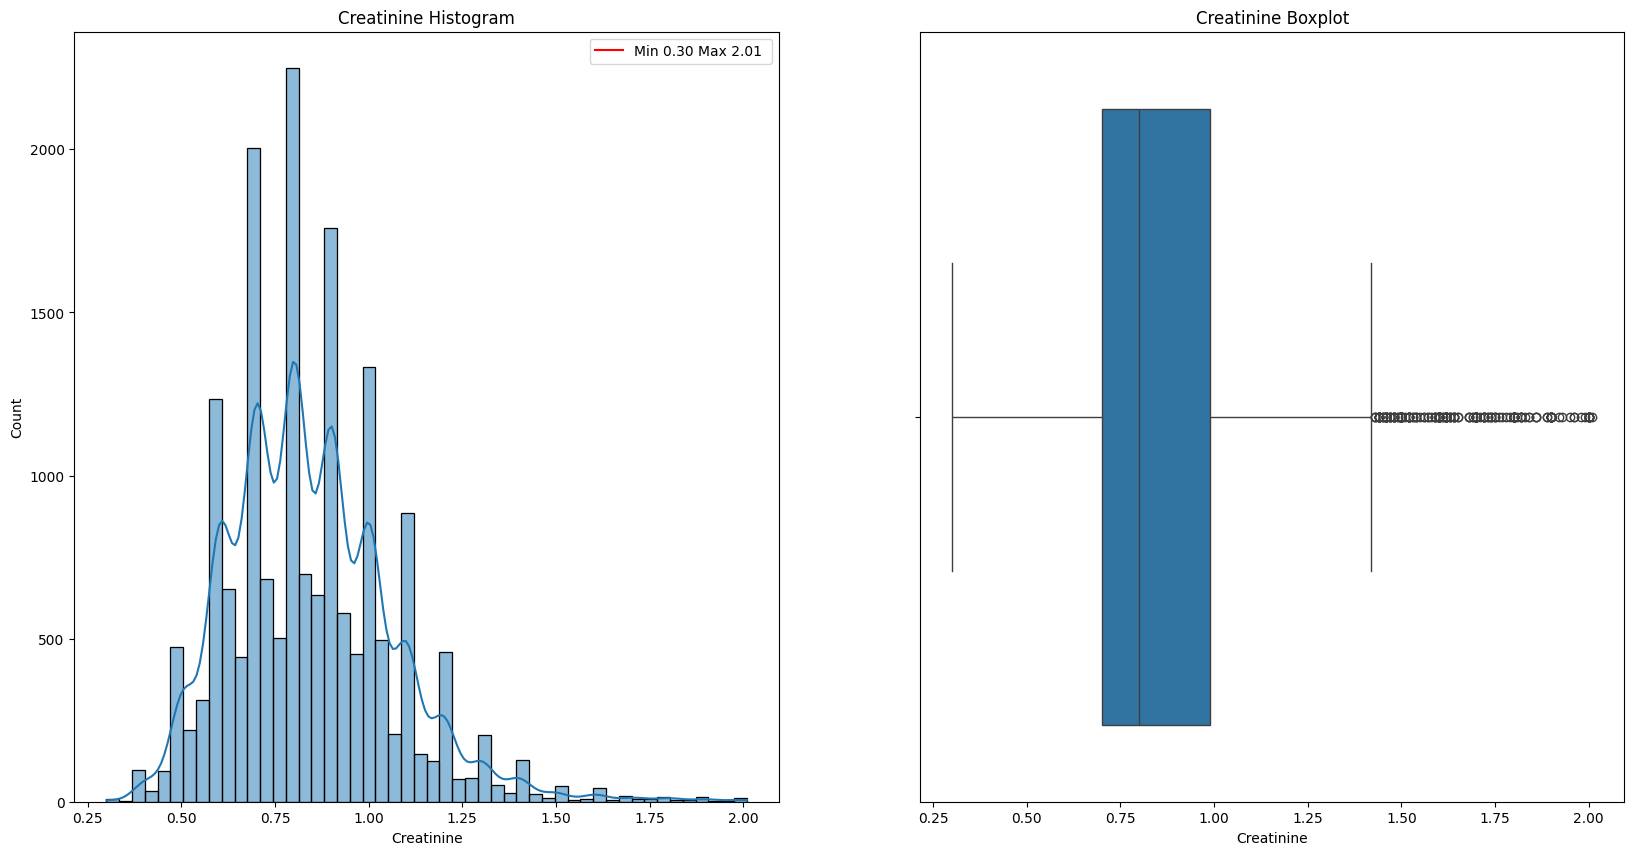

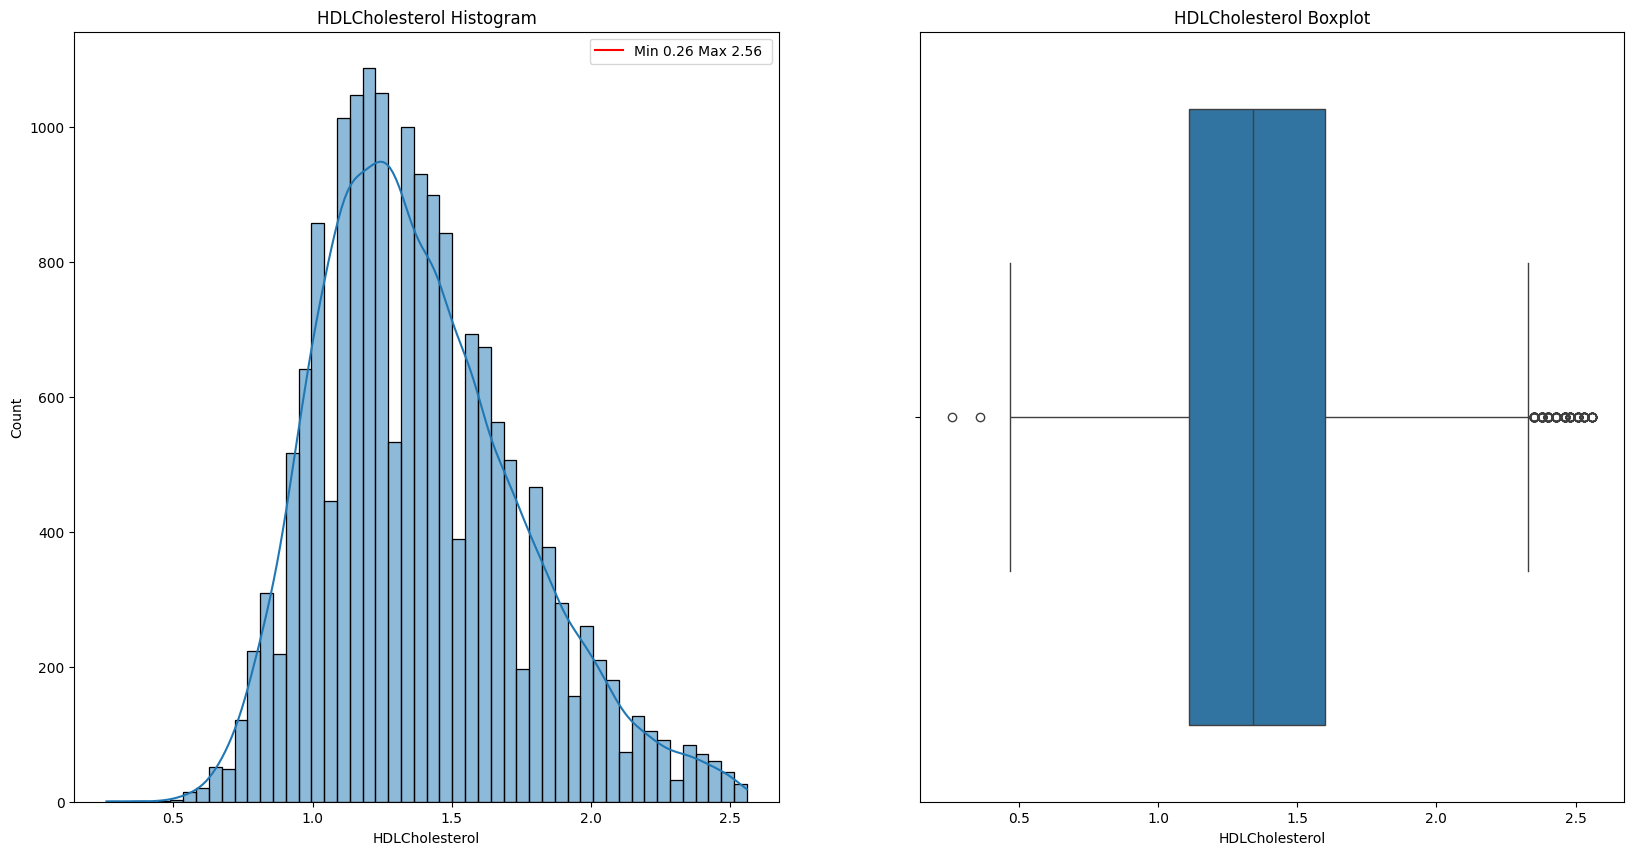

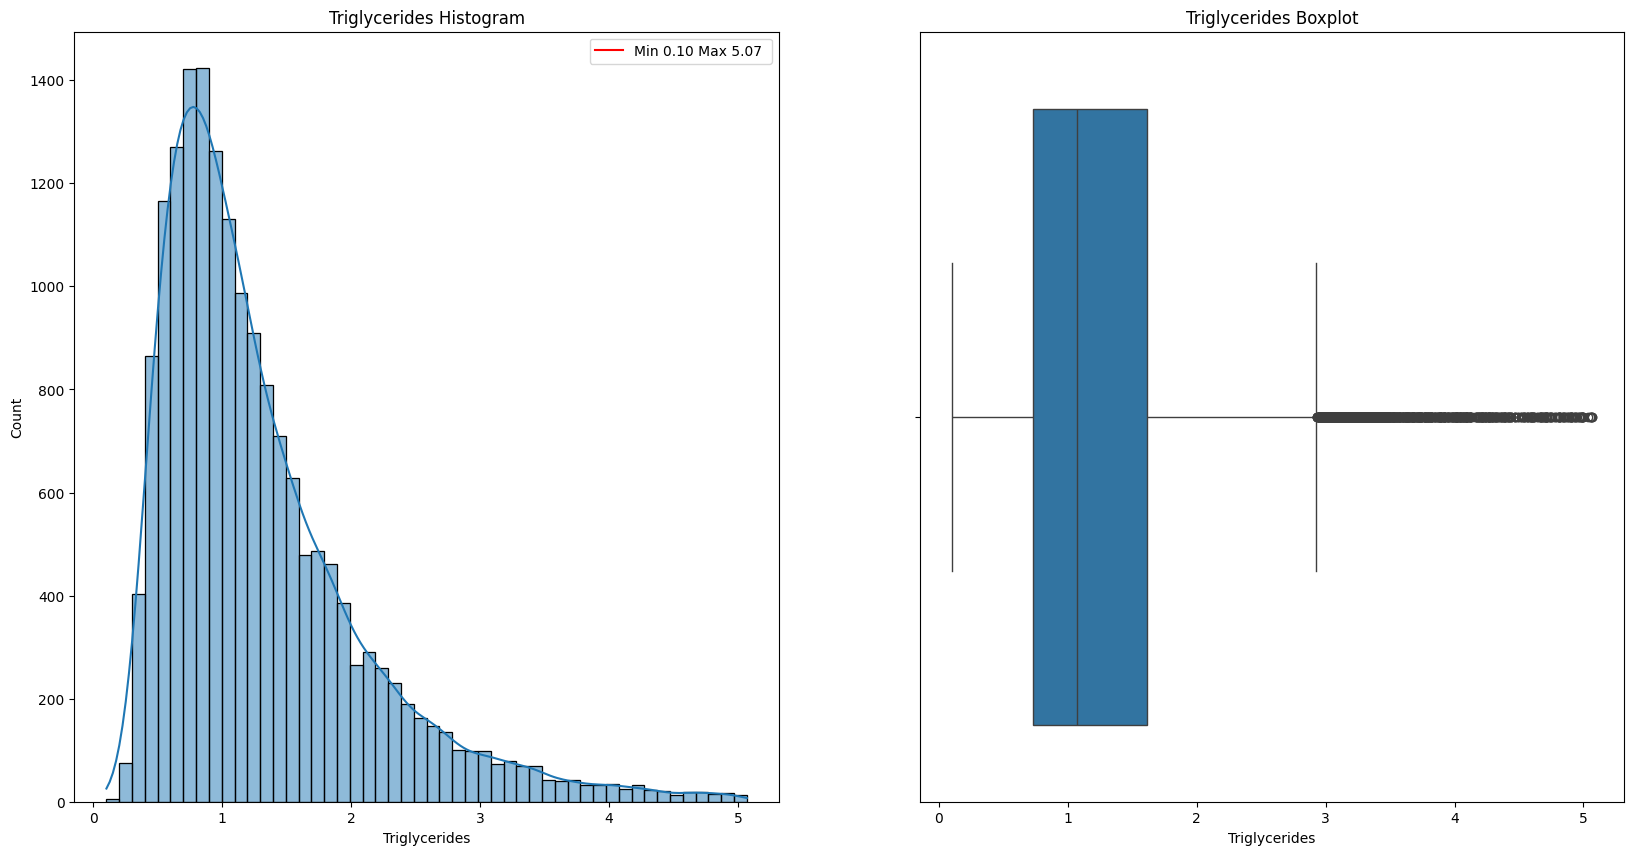

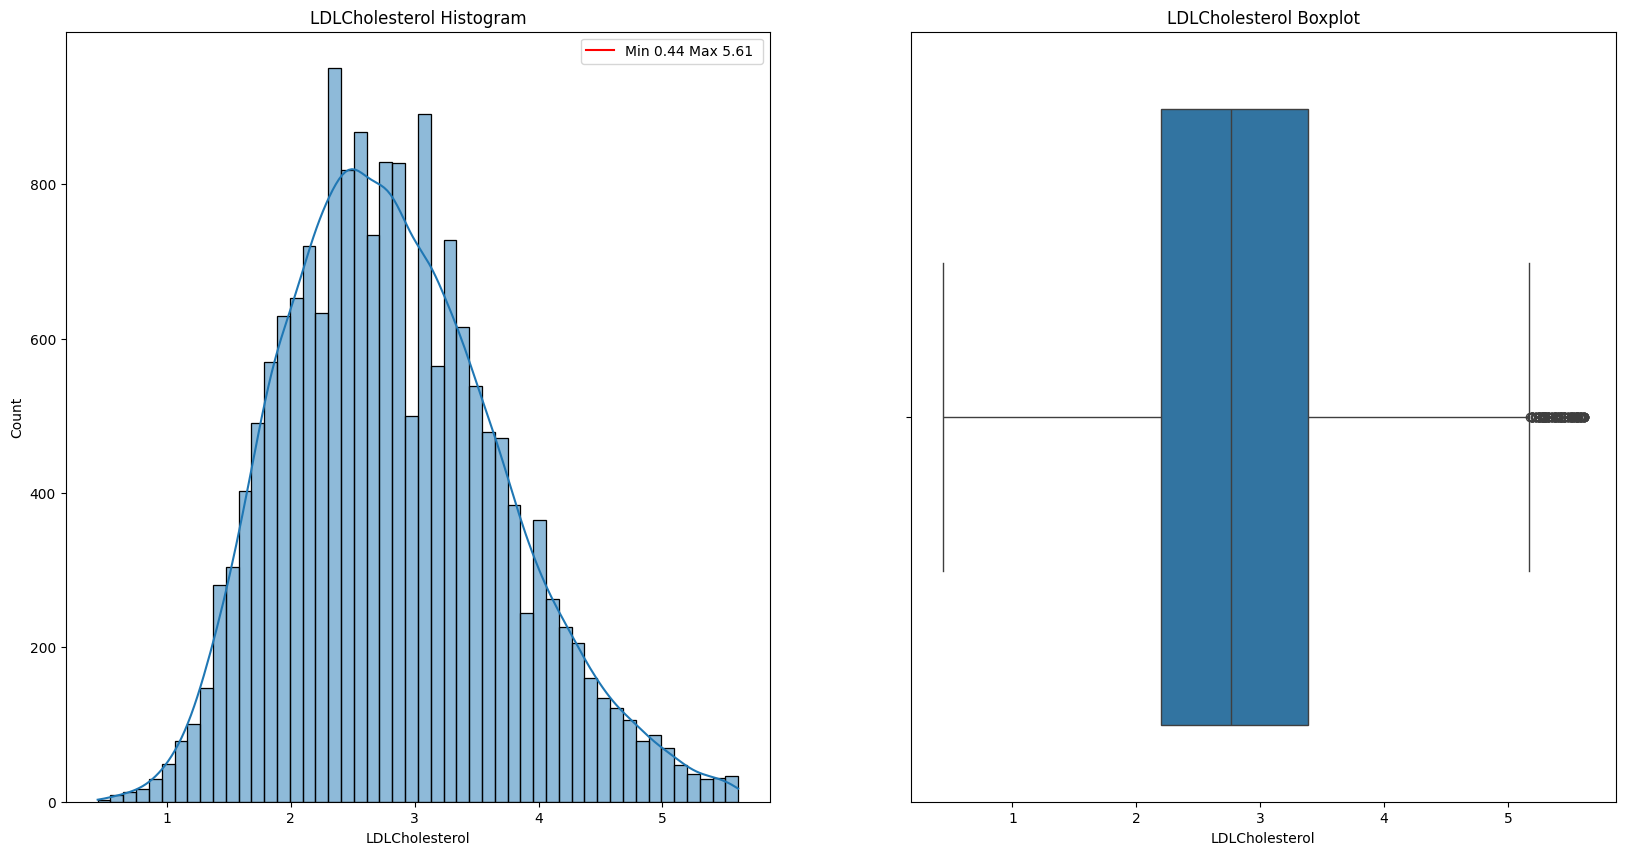

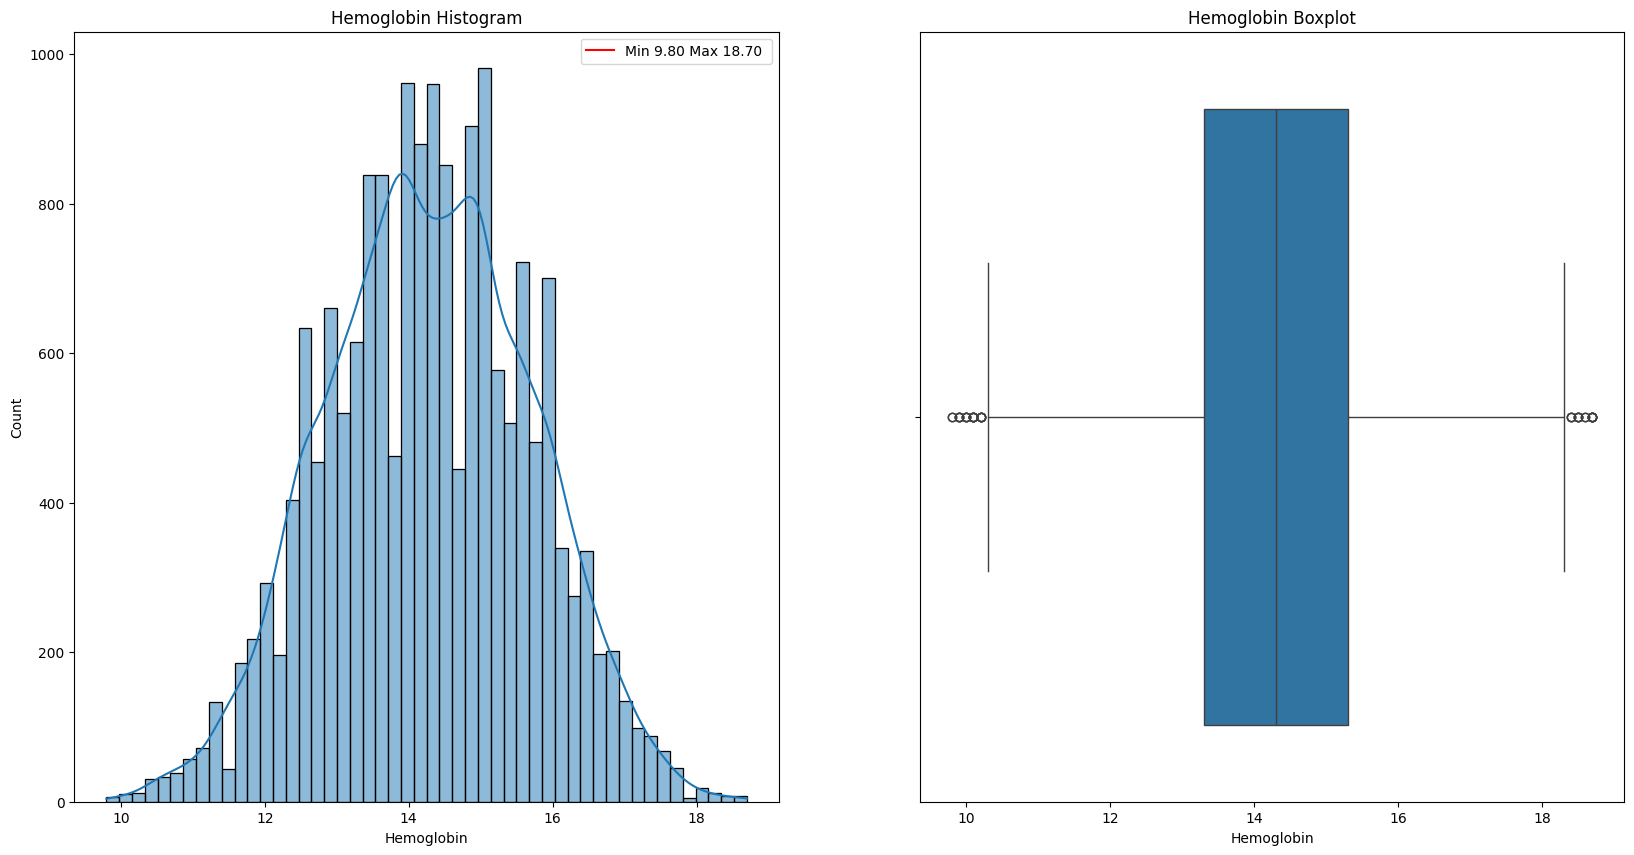

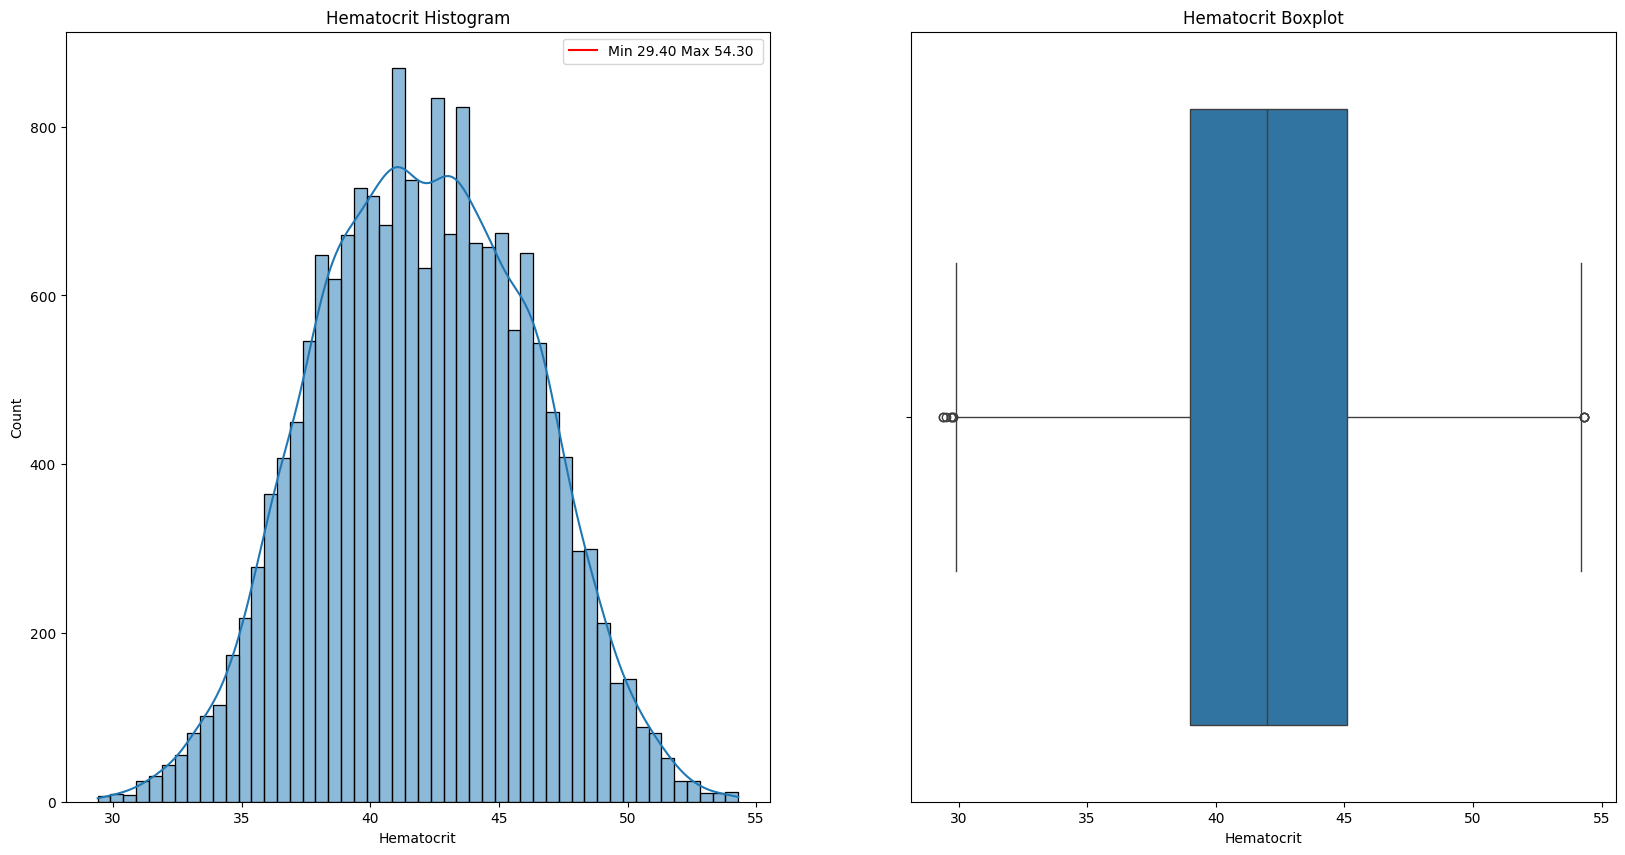

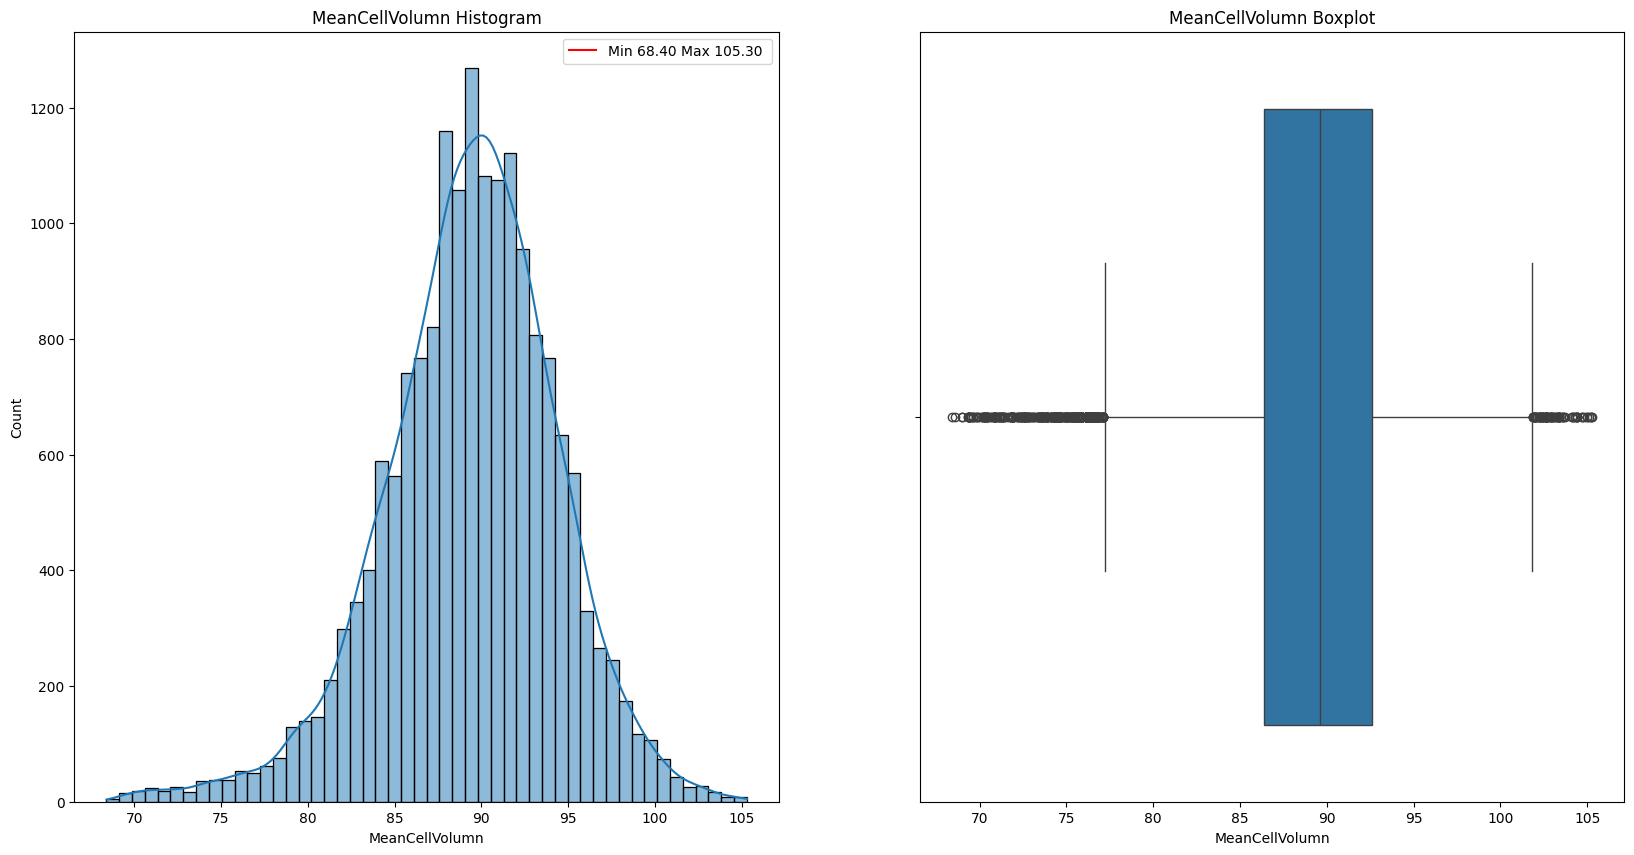

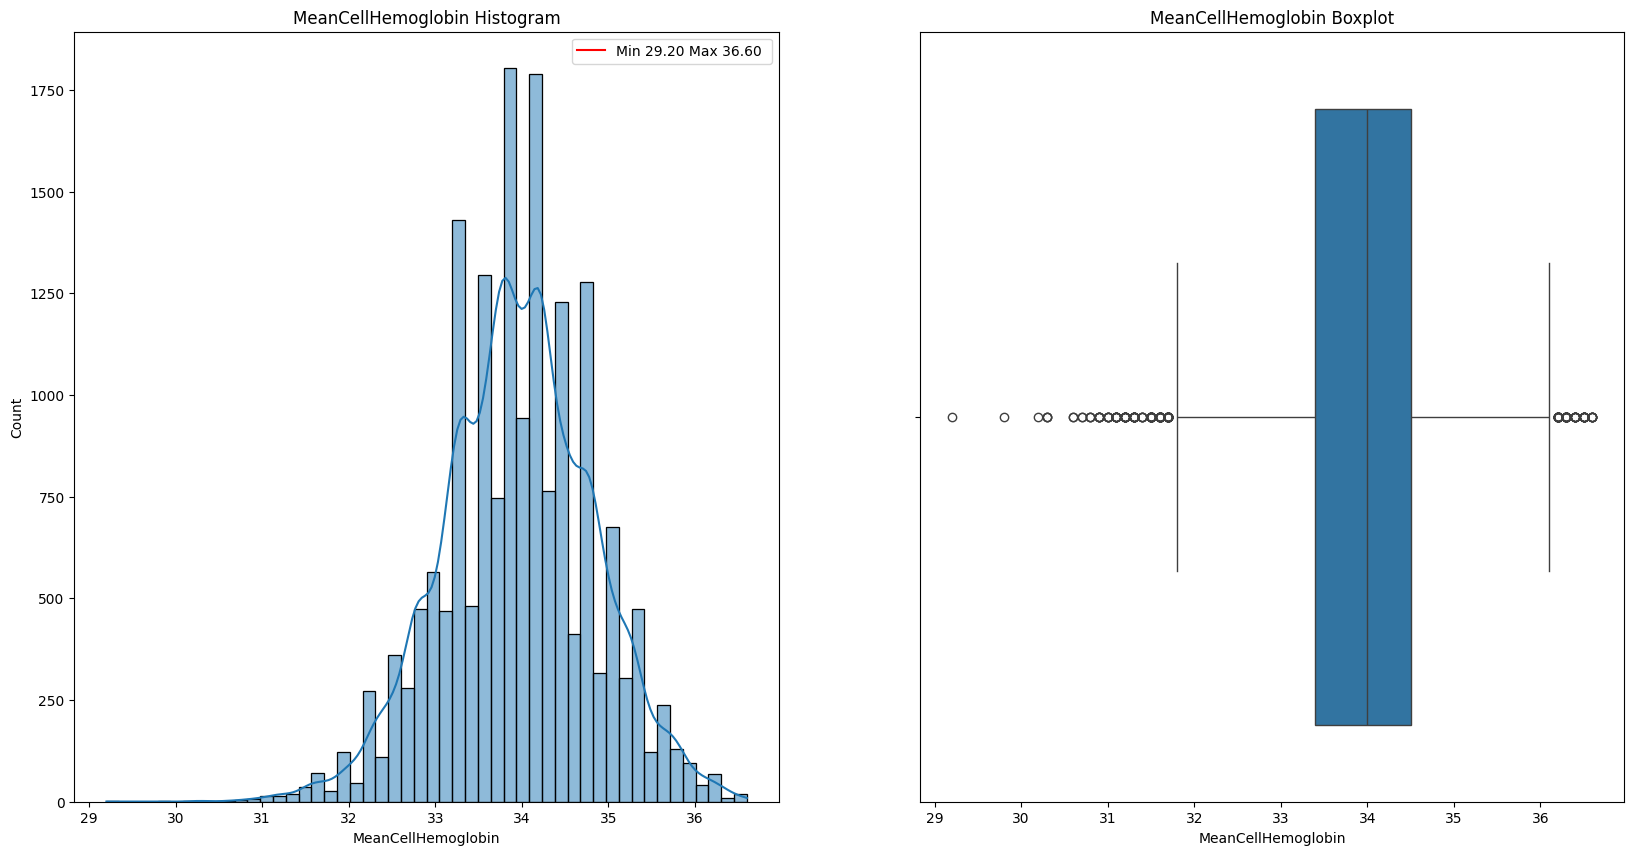

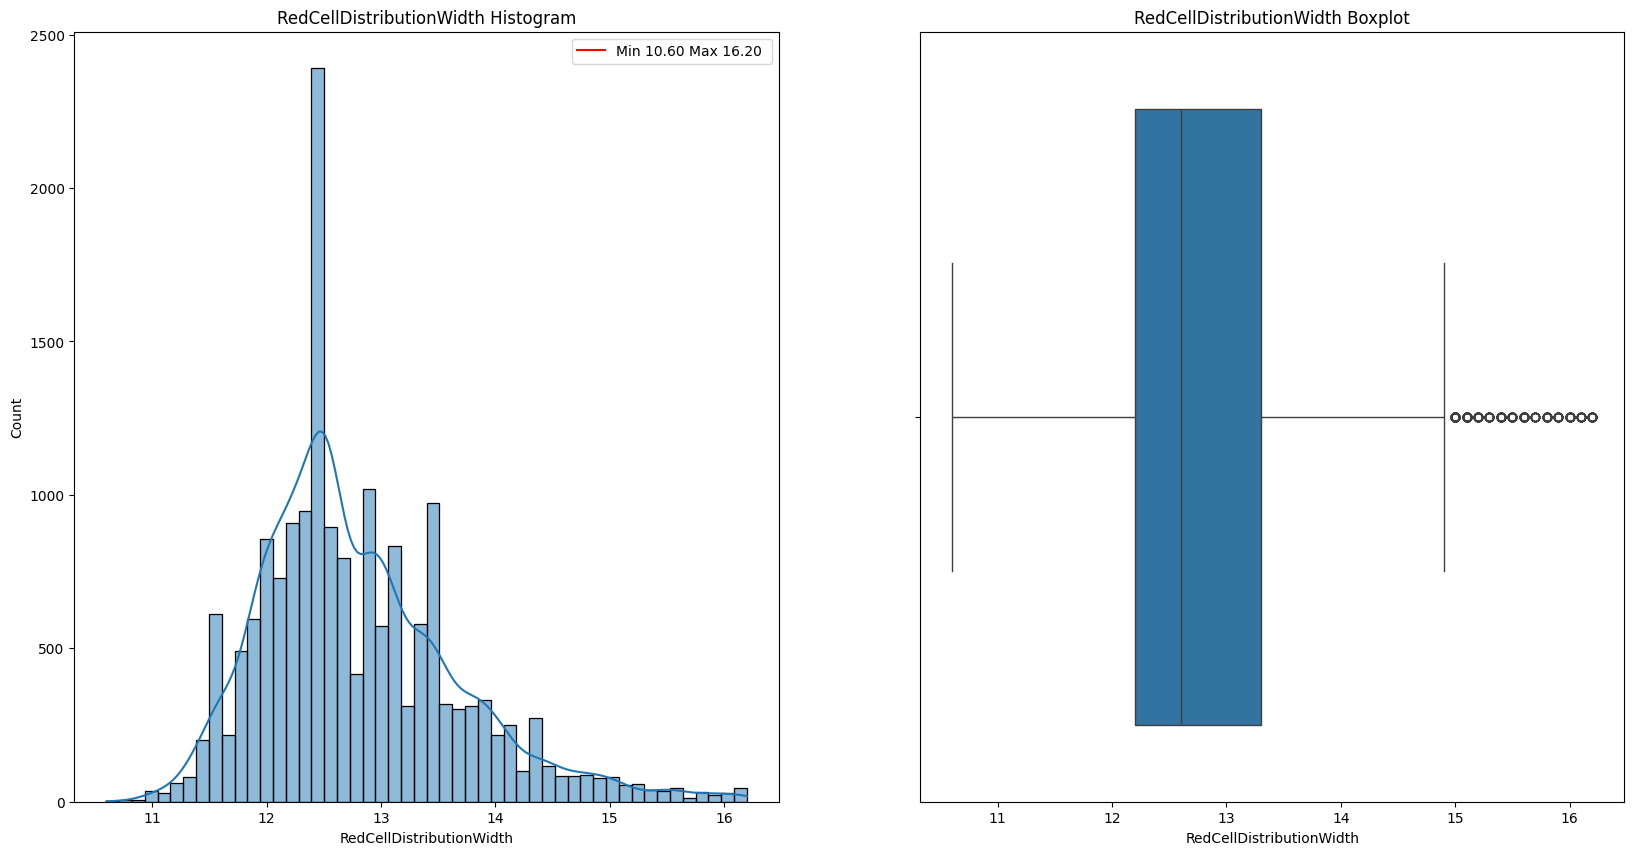

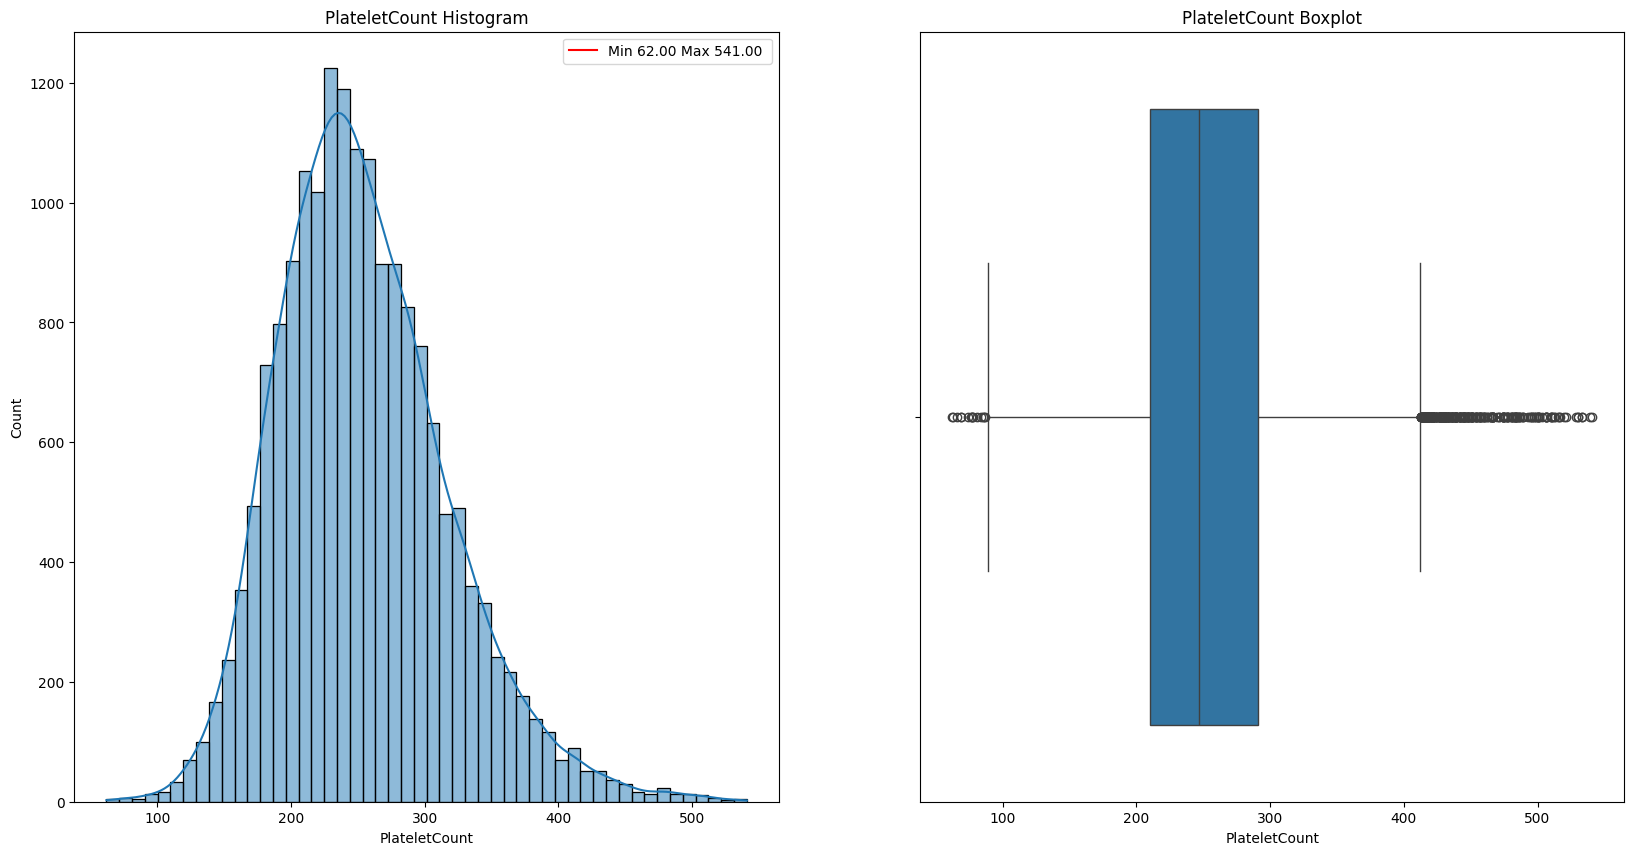

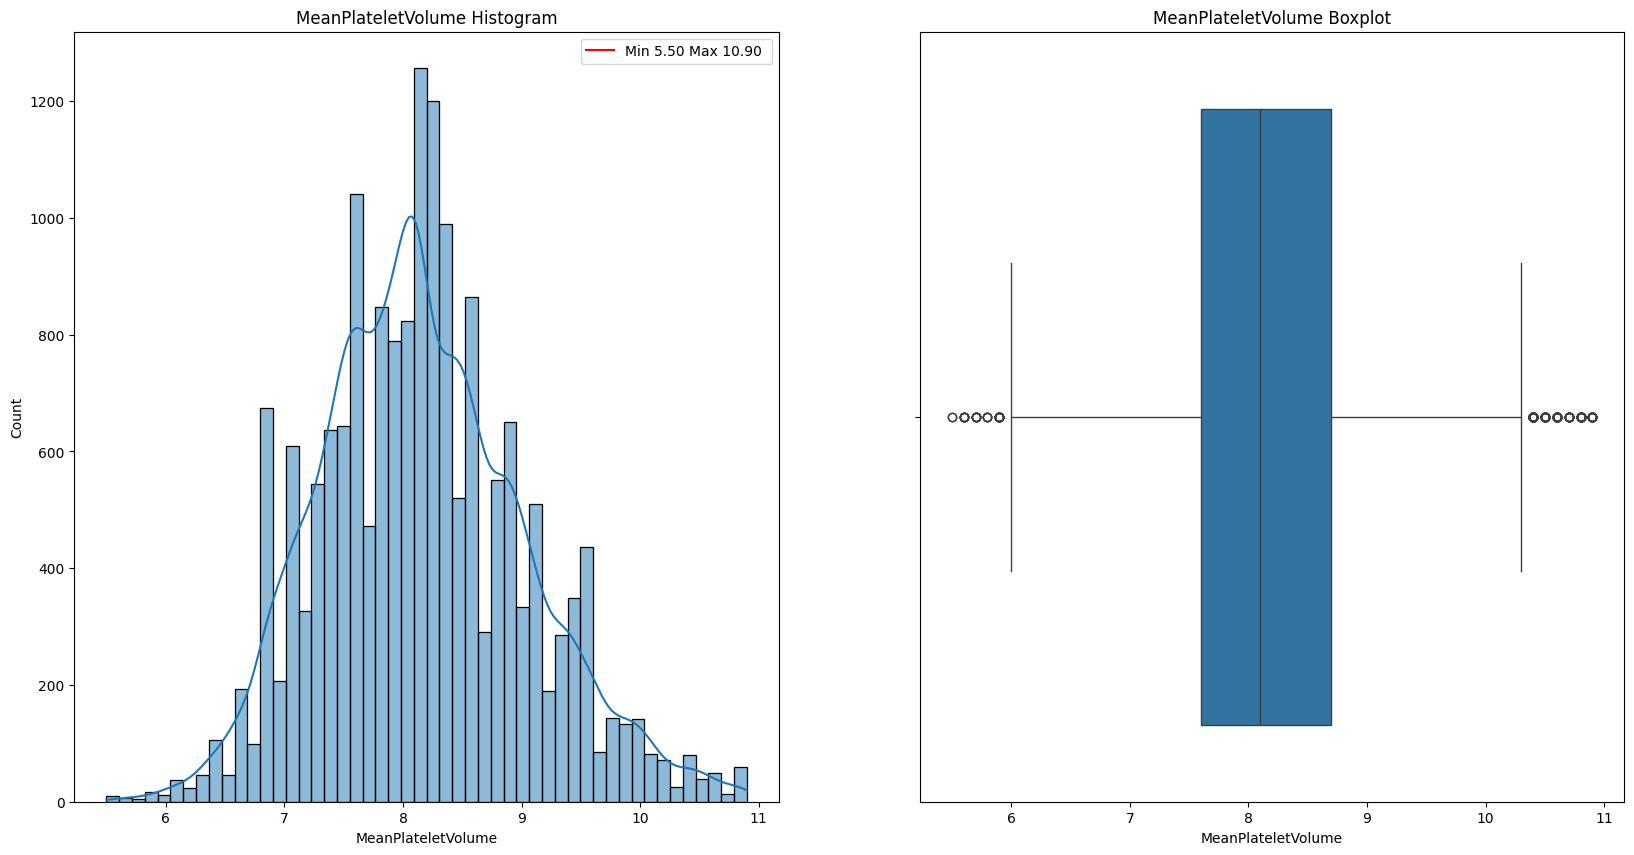

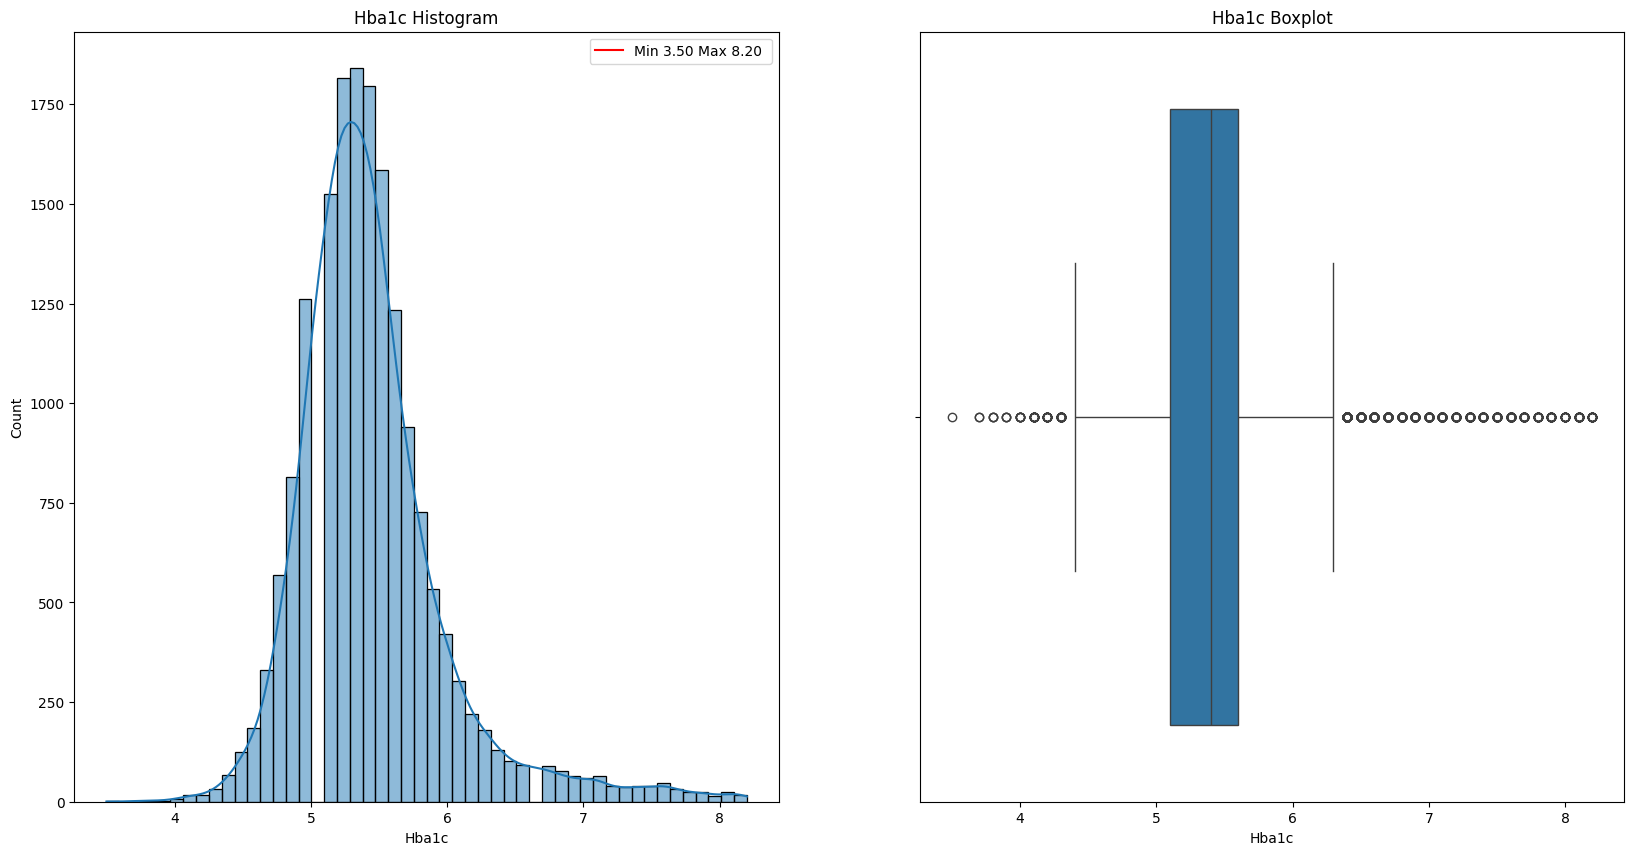

In [14]:
df_scaled = df_train.copy()
df_scaled.drop(columns=category_columns, inplace=True)

for col in df_scaled.columns:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[col], bins=50, kde=True)
    plt.plot([], [], label = f"Min {df_scaled[col].min():.2f} Max {df_scaled[col].max():.2f} ", color='red')
    plt.legend()
    plt.title(f"{col} Histogram")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f"{col} Boxplot")

    plt.show()

In [15]:
# Import metrics and  standard scaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [16]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Creatinine', 'HDLCholesterol', 'Triglycerides',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'milk_consumption', 'label', 'Race_1.0',
       'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [17]:
# remove_columns = [
#     'UricAcid','LDLCholesterol','ALT', 'MeanCellVolumn','Hemoglobin'
#     # 'MeanCellHemoglobin',
# ]
remove_columns = [
        'WaistCircumference', 'ALT', 'LDLCholesterol', 'Hematocrit', 'RedCellDistributionWidth',  'PlateletCount', 'MeanPlateletVolume'
]

In [18]:
df_train = df_train.drop(columns=remove_columns)

In [19]:
df_test = df_test[df_train.columns]

In [20]:
df_test.describe()

,Gender,Age,BMI,UricAcid,AST,AlkalinePhosphotase,Creatinine,HDLCholesterol,Triglycerides,Hemoglobin,MeanCellVolumn,MeanCellHemoglobin,Hba1c,milk_consumption,label
count,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5.199000e+03,5199.00000
mean,1.514522,44.598577,28.739681,321.779150,23.379881,85.388344,0.846301,1.408177,1.304606,14.061127,88.163589,33.288171,5.767667,1.766494e+00,0.64397
std,0.499837,20.615375,7.211084,85.727761,16.707374,51.782459,0.378246,0.411060,0.755869,1.518299,6.246144,0.928436,1.097112,1.087595e+00,0.47887
min,1.000000,12.000000,15.100000,47.600000,6.000000,16.000000,0.250000,0.160000,0.147000,6.300000,50.800000,25.200000,4.000000,5.397605e-79,0.00000
25%,1.000000,26.000000,23.600000,261.700000,17.000000,59.000000,0.670000,1.110000,0.768000,13.100000,85.100000,32.800000,5.200000,1.000000e+00,0.00000
50%,2.000000,45.000000,27.700000,315.200000,21.000000,73.000000,0.800000,1.340000,1.106000,14.100000,88.600000,33.300000,5.500000,2.000000e+00,1.00000
75%,2.000000,62.000000,32.700000,374.700000,26.000000,92.000000,0.960000,1.630000,1.637000,15.100000,92.000000,33.900000,5.900000,3.000000e+00,1.00000
max,2.000000,80.000000,65.300000,1070.600000,832.000000,624.000000,11.460000,5.840000,4.889000,19.000000,114.300000,36.400000,17.000000,3.000000e+00,1.00000


In [21]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'UricAcid', 'AST', 'AlkalinePhosphotase',
       'Creatinine', 'HDLCholesterol', 'Triglycerides', 'Hemoglobin',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'Hba1c', 'milk_consumption',
       'label', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [22]:
df_train.describe()

,Gender,Age,BMI,UricAcid,AST,AlkalinePhosphotase,Creatinine,HDLCholesterol,Triglycerides,Hemoglobin,MeanCellVolumn,MeanCellHemoglobin,Hba1c,milk_consumption,label
count,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,1.756300e+04,17563.000000
mean,1.517508,41.060126,27.250234,269.118757,23.537778,77.947389,0.844361,1.384821,1.292251,14.278586,89.375557,33.953425,5.442772,2.054717e+00,0.639185
std,0.499708,21.255926,6.030104,135.219112,6.489362,38.177436,0.217721,0.360981,0.788378,1.416546,4.997098,0.869459,0.544676,1.071002e+00,0.480251
min,1.000000,12.000000,13.300000,2.133000,7.000000,9.000000,0.300000,0.260000,0.102000,9.800000,68.400000,29.200000,3.500000,5.397605e-79,0.000000
25%,1.000000,20.000000,22.785000,220.100000,19.000000,55.000000,0.700000,1.110000,0.734000,13.300000,86.400000,33.400000,5.100000,1.000000e+00,0.000000
50%,2.000000,39.000000,26.520000,291.500000,22.000000,69.000000,0.800000,1.340000,1.073000,14.300000,89.600000,34.000000,5.400000,2.000000e+00,1.000000
75%,2.000000,59.000000,30.780000,356.900000,26.000000,87.000000,0.990000,1.600000,1.614000,15.300000,92.600000,34.500000,5.600000,3.000000e+00,1.000000
max,2.000000,85.000000,48.220000,678.100000,55.000000,267.000000,2.010000,2.560000,5.069000,18.700000,105.300000,36.600000,8.200000,3.000000e+00,1.000000


In [23]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'UricAcid', 'AST', 'AlkalinePhosphotase',
       'Creatinine', 'HDLCholesterol', 'Triglycerides', 'Hemoglobin',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'Hba1c', 'milk_consumption',
       'label', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [25]:
df = pd.concat([df_train,df_test])

In [27]:
df['label'].value_counts()

label
1.0    14574
0.0     8188
Name: count, dtype: int64

In [28]:
category_columns = ['Gender','milk_consumption']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score,
    brier_score_loss
)


# === 2. Features and Label ===
X = df.drop(columns=["label"])
y = df["label"].values

# === 3. Define categorical and numerical features ===
categorical_features = ["Gender","milk_consumption"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# === 4. Preprocessing ===
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
])

# === 5. Models ===
models = {
    "GBM": GradientBoostingClassifier(),
    "LR": LogisticRegression(max_iter=1000),
    "Nnet": MLPClassifier(max_iter=1000),
    "RF": RandomForestClassifier(),
    "LGBM":  LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# === 6. Evaluation Function ===
def evaluate_model(name, model, X, y):
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    metrics = {
        "AUC": [], "ACC": [], "PPV": [], "NPV": [], "SEN": [],
        "SPE": [], "F1 score": [], "MCC": [], "KAPPA": [], "Brier score": []
    }

    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    for train_idx, test_idx in sss.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        metrics["AUC"].append(roc_auc_score(y_test, y_proba))
        metrics["ACC"].append(accuracy_score(y_test, y_pred))
        metrics["PPV"].append(precision_score(y_test, y_pred, zero_division=0))
        metrics["NPV"].append(tn / (tn + fn) if (tn + fn) > 0 else 0)
        metrics["SEN"].append(recall_score(y_test, y_pred))  # Sensitivity
        metrics["SPE"].append(tn / (tn + fp) if (tn + fp) > 0 else 0)  # Specificity
        metrics["F1 score"].append(f1_score(y_test, y_pred,))
        metrics["MCC"].append(matthews_corrcoef(y_test, y_pred))
        metrics["KAPPA"].append(cohen_kappa_score(y_test, y_pred))
        metrics["Brier score"].append(brier_score_loss(y_test, y_proba))

    return {metric: np.mean(values) for metric, values in metrics.items()}

# === 7. Run All Models ===
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(name, model, X, y)

# === 8. Export Results ===
results_df = pd.DataFrame(results).T
results_df.index.name = "Method"
results_df.to_csv("evaluation_mine_v2.csv")
print(results_df)

Evaluating GBM...
Evaluating LR...
Evaluating Nnet...
Evaluating RF...
Evaluating LGBM...
[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694
[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> 

c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694
[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1848
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694
[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694
[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1842
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694
[LightGBM] [Info] Number of positive: 10202, number of negative: 5731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 15933, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640306 -> initscore=0.576694
[LightGBM] [Info] Start training from score 0.576694


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.upda

Evaluating XGBoost...


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

              AUC       ACC       PPV       NPV       SEN       SPE  F1 score  \
Method                                                                          
GBM      0.743781  0.713457  0.729372  0.660038  0.878339  0.420065  0.796944   
LR       0.732490  0.711437  0.730157  0.650903  0.871272  0.427025  0.794492   
Nnet     0.705162  0.690716  0.728950  0.591411  0.823079  0.455189  0.773088   
RF       0.735955  0.711920  0.735430  0.642269  0.859103  0.450020  0.792461   
LGBM     0.740740  0.713296  0.733721  0.650032  0.866720  0.440293  0.794688   
XGBoost  0.722112  0.701318  0.733912  0.613263  0.836940  0.459992  0.782030   

              MCC     KAPPA  Brier score  
Method                                    
GBM      0.340872  0.324209     0.190128  
LR       0.337143  0.322590     0.193660  
Nnet     0.298539  0.292979     0.210211  
RF       0.341688  0.330797     0.192831  
LGBM     0.343240  0.330356     0.191357  
XGBoost  0.321062  0.314104     0.201618  


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:33:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [191]:
print(X.columns)

Index(['Gender', 'Age', 'BMI', 'UricAcid', 'AST', 'AlkalinePhosphotase',
       'Creatinine', 'HDLCholesterol', 'Triglycerides', 'Hemoglobin',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'Hba1c', 'milk_consumption',
       'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4595
           1       0.55      0.50      0.52      2174

    accuracy                           0.71      6769
   macro avg       0.66      0.65      0.66      6769
weighted avg       0.70      0.71      0.70      6769



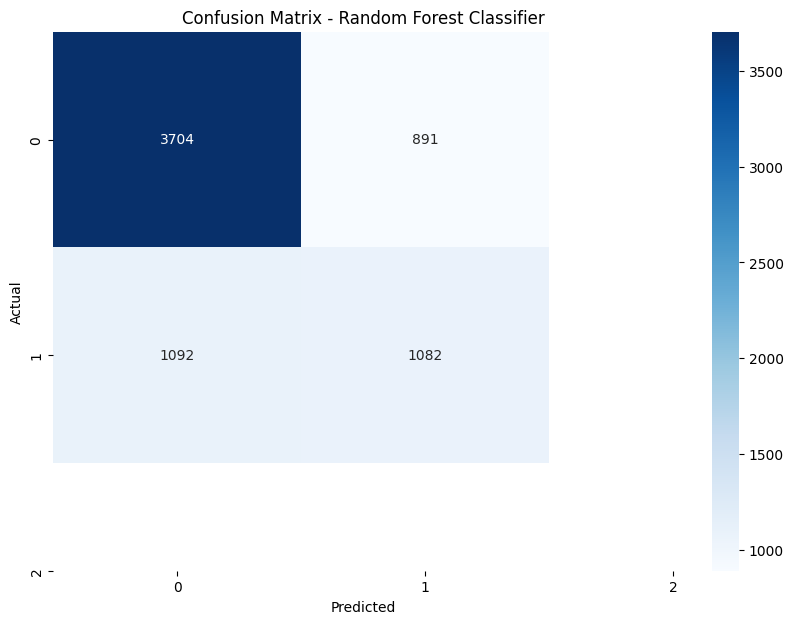

In [149]:
sc = StandardScaler()
for col in df_train.columns:
    if col not in category_columns:
        df_train[col] = sc.fit_transform(df_train[[col]])
        df_test[col] = sc.transform(df_test[[col]])

# Split data into train and test sets
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [189]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'UricAcid', 'AST', 'AlkalinePhosphotase',
       'Creatinine', 'HDLCholesterol', 'Triglycerides', 'Hemoglobin',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'Hba1c', 'milk_consumption',
       'label', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

Class distribution before weighting: Counter({0: 22930, 1: 13707})
Class weights: {0: 0.7988879197557784, 1: 1.3364339388633546}
XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      4595
           1       0.50      0.64      0.56      2174

    accuracy                           0.68      6769
   macro avg       0.65      0.67      0.66      6769
weighted avg       0.71      0.68      0.69      6769



c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


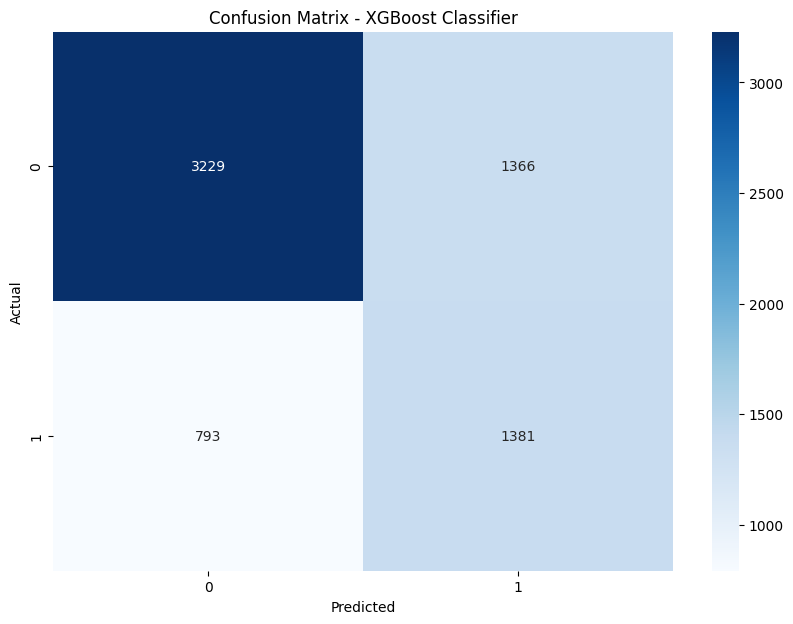

In [150]:
# Train an XGBoost Classifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42,sampling_strategy='not majority')


counter = Counter(y_train)
n_total = len(y_train)
class_weights = {cls: n_total / (len(counter) * count) for cls, count in counter.items()}
sample_weight = np.array([class_weights[int(lbl)] for lbl in y_train])

print("Class distribution before weighting:", counter)
print("Class weights:", class_weights)

# 2. Train XGBoost với sample_weight
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Class distribution before weighting: Counter({0: 22930, 1: 13707})
Class weights: {0: 0.7988879197557784, 1: 1.3364339388633546}
Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Best parameters found:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
🔍 Classification Report (XGBoost with f1_macro):
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      4595
           1       0.51      0.68      0.59      2174

    accuracy                           0.69      6769
   macro avg       0.67      0.69      0.67      6769
weighted avg       0.72      0.69      0.70      6769



c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


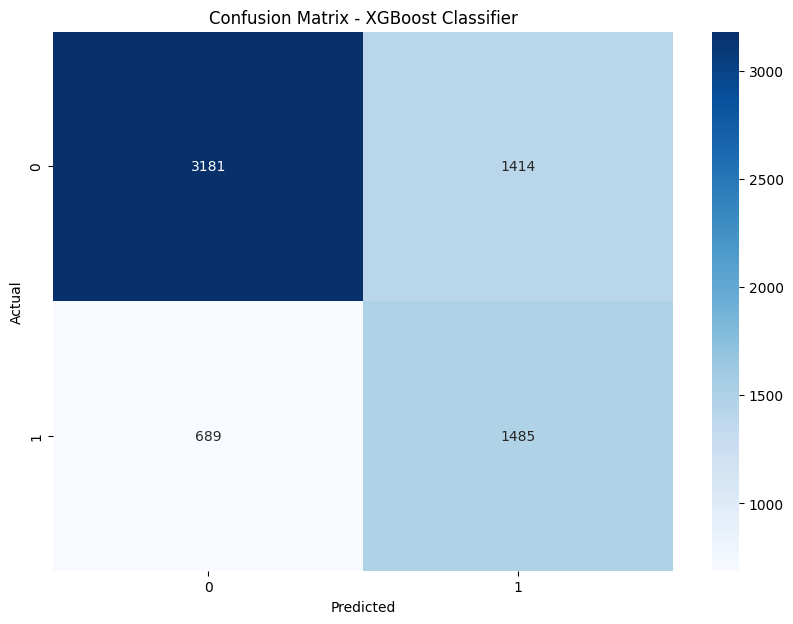

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Example: Load and split data (replace with your actual dataset)
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# Split your data
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Compute class weights manually
counter = Counter(y_train)
n_total = len(y_train)
class_weights = {cls: n_total / (len(counter) * count) for cls, count in counter.items()}
sample_weight = np.array([class_weights[int(lbl)] for lbl in y_train])

print("Class distribution before weighting:", counter)
print("Class weights:", class_weights)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit with sample_weight
grid_search.fit(X_train, y_train, sample_weight=sample_weight)

# Output best parameters
print("✅ Best parameters found:")
print(grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

# Evaluation
print("🔍 Classification Report (XGBoost with f1_macro):")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


After SMOTE: Counter({0: 22930, 1: 22930})
Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters found:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
🔍 Classification Report (XGBoost with f1_macro):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4595
           1       0.53      0.57      0.55      2174

    accuracy                           0.70      6769
   macro avg       0.66      0.67      0.66      6769
weighted avg       0.71      0.70      0.70      6769



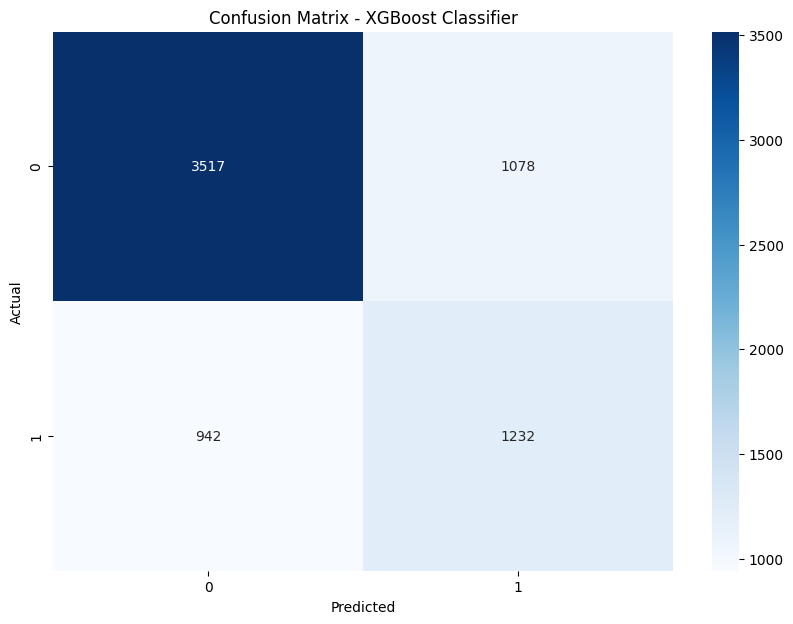

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Example: Load and split data
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# ✅ Apply SMOTE to training data only
smote = SMOTE(random_state=42,sampling_strategy='not majority',k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Print class balance after SMOTE
print("After SMOTE:", Counter(y_train_resampled))

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.002, 0.1, 0.2,0.0125],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up GridSearchCV with f1_macro scoring
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Train using resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("✅ Best parameters found:")
print(grid_search.best_params_)

# Predict on original test set
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

# Evaluation
print("🔍 Classification Report (XGBoost with f1_macro):")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


After SMOTE: Counter({1.0: 11226, 0.0: 11226})
🔍 Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.42      0.69      0.52      1851
         1.0       0.73      0.47      0.57      3348

    accuracy                           0.55      5199
   macro avg       0.58      0.58      0.55      5199
weighted avg       0.62      0.55      0.55      5199



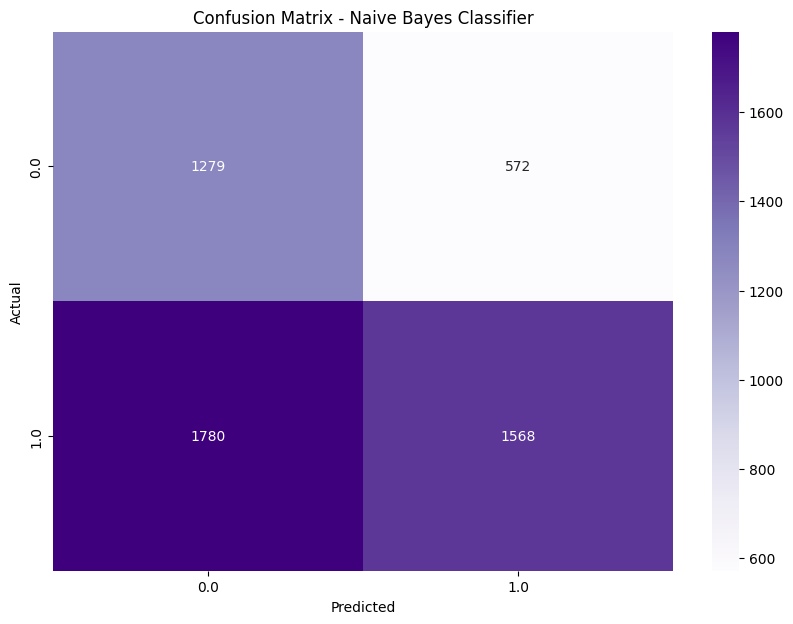

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Example: Load and split data
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ✅ Apply SMOTE to training data only
smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class balance after SMOTE
print("After SMOTE:", Counter(y_train_resampled))

# Create the Naive Bayes classifier
nb = GaussianNB()

# Train on resampled data
nb.fit(X_train_resampled, y_train_resampled)

# Predict on original test set
y_pred_nb = nb.predict(X_test)

# Evaluation
print("🔍 Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


After SMOTE: Counter({1.0: 11226, 0.0: 11226})
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best parameters found:
{'var_smoothing': np.float64(1e-09)}
🔍 Classification Report (Naive Bayes with GridSearch):
              precision    recall  f1-score   support

         0.0       0.42      0.69      0.52      1851
         1.0       0.73      0.47      0.57      3348

    accuracy                           0.55      5199
   macro avg       0.58      0.58      0.55      5199
weighted avg       0.62      0.55      0.55      5199



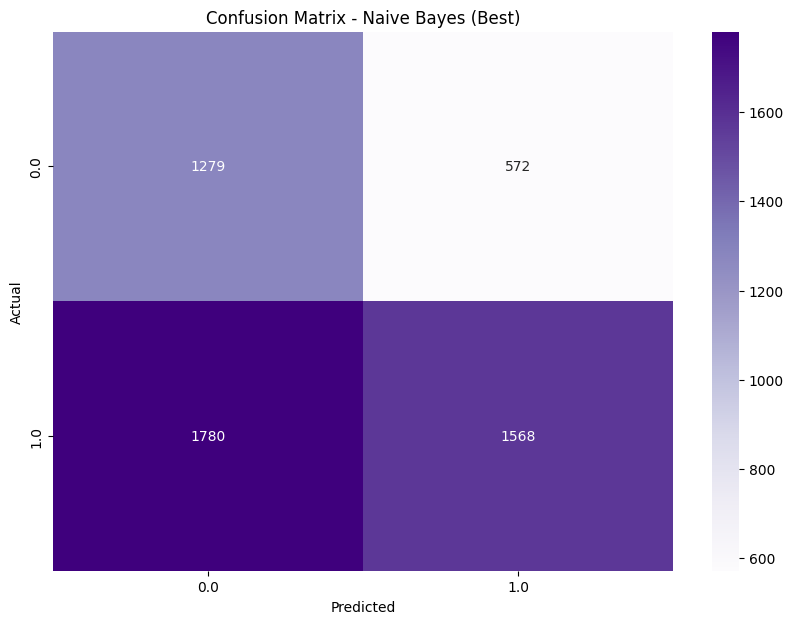

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Example: Load and split your data
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ✅ Apply SMOTE to training data only
smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class balance after SMOTE
print("After SMOTE:", Counter(y_train_resampled))

# 🔍 Define GaussianNB and hyperparameter grid
nb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(-9, -6, 10)
}

# 🧠 Grid Search with f1_macro scoring
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 🚀 Fit model
grid_search.fit(X_train_resampled, y_train_resampled)

# ✅ Best model
print("✅ Best parameters found:")
print(grid_search.best_params_)

best_nb = grid_search.best_estimator_

# 🎯 Predict on test data
y_pred_nb = best_nb.predict(X_test)

# 📊 Evaluation
print("🔍 Classification Report (Naive Bayes with GridSearch):")
print(classification_report(y_test, y_pred_nb))

# 📉 Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Naive Bayes (Best)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


After SMOTE: Counter({1.0: 11226, 0.0: 11226})
Training stacking ensemble...


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


🔍 Classification Report (Stacking Ensemble):
              precision    recall  f1-score   support

         0.0       0.50      0.55      0.52      1851
         1.0       0.74      0.70      0.72      3348

    accuracy                           0.64      5199
   macro avg       0.62      0.62      0.62      5199
weighted avg       0.65      0.64      0.65      5199



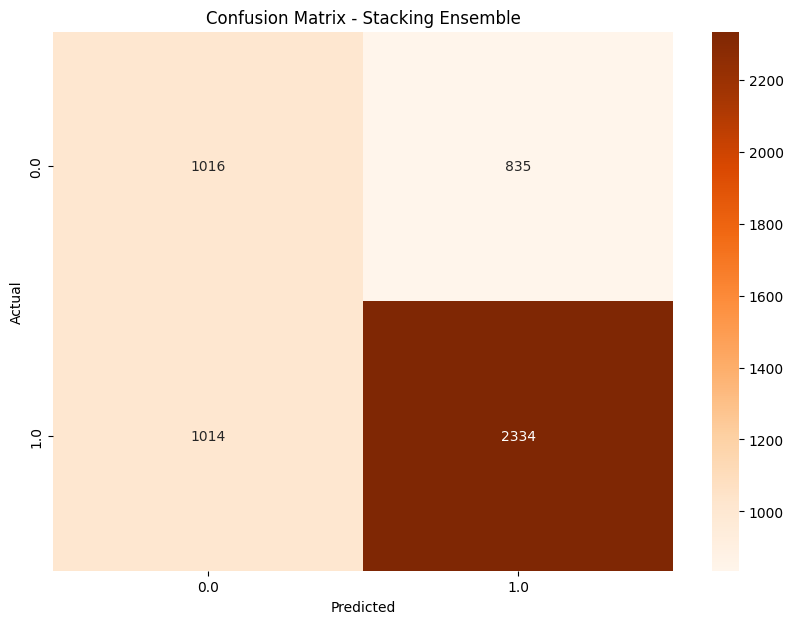

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier


import mord  # for ordinal logistic regression
from sklearn.base import BaseEstimator, ClassifierMixin

# Mord ordinal logistic regression wrapper
class MordOrdinalLogisticWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.model = mord.LogisticAT(alpha=self.alpha)
        self.classes_ = None

    def fit(self, X, y):
        self.model.fit(X, y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        return np.ones((n_samples, n_classes)) / n_classes


# SMOTE oversampling
smote = SMOTE(random_state=42, sampling_strategy='not majority', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_resampled))

base_models = [
    ('nb1', GaussianNB()),  # first Gaussian Naive Bayes
    ('dt', DecisionTreeClassifier(random_state=42)),  # Decision Tree added
    #('gb', GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5,n_estimators=100,random_state=42)),
    # ('nb2', GaussianNB()),  # second Gaussian Naive Bayes (can be used as another base)
    # ('nb3', GaussianNB()),  # second Gaussian Naive Bayes (can be used as another base)
    ('olr', MordOrdinalLogisticWrapper(alpha=1.0)),
    # ('enor', LogisticRegression(
    #     penalty='elasticnet',
    #     solver='saga',
    #     max_iter=1000,
    #     random_state=42,
    #     multi_class='multinomial',
    #     C=1.0,
    #     l1_ratio=1.0
    # )),
    # ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('SGDClassifier', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)),
    ('lbm', LGBMClassifier(random_state=42)),
    #('xg', XGBClassifier(colsample_bytree=1.0,learning_rate=0.1,max_depth=7, n_estimators=50,subsample=1.0,use_label_encoder=False,eval_metric='mlogloss',random_state=42))
]
# xgboost best param: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
# gradient boosting best param: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


# Meta-model
meta_model =  LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=1000,
        random_state=42,
        multi_class='multinomial',
        C=1.0,        # fixed regularization strength
        l1_ratio=1.0  # fixed mix between l1 and l2
    ) 


# Build stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Train stacking model
print("Training stacking ensemble...")
stacking_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = stacking_model.predict(X_test)

print("🔍 Classification Report (Stacking Ensemble):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Stacking Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ After SMOTE: Counter({1.0: 11226, 0.0: 11226})

🚀 Training and Evaluating: GaussianNB
⚠️ Could not compute AUC for GaussianNB: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.41      0.67      0.51      1851
         1.0       0.72      0.47      0.57      3348

    accuracy                           0.54      5199
   macro avg       0.57      0.57      0.54      5199
weighted avg       0.61      0.54      0.55      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.5409
📊 F1 Score (Macro): 0.5390
📊 F1 Score (Weighted): 0.5475
📊 Precision (PPV Macro): 0.5656
📊 NPV (Macro): 0.5656
📊 Sensitivity (Recall Macro): 0.5697
📊 Specificity (Macro): 0.5697
📊 Cohen's Kappa: 0.1222
📊 Matthews Corr Coef: 0.1353
📊 Balanced Accuracy: 0.5697


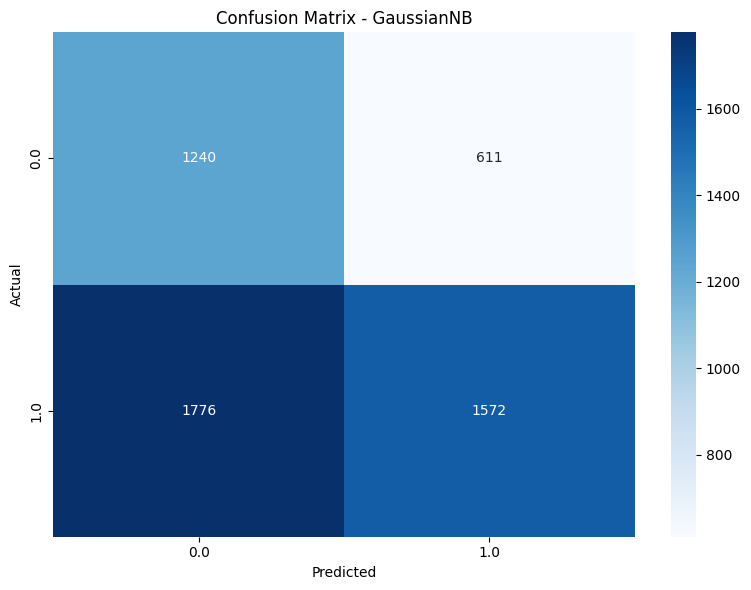


🚀 Training and Evaluating: GradientBoosting
⚠️ Could not compute AUC for GradientBoosting: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.58      0.55      1851
         1.0       0.75      0.71      0.73      3348

    accuracy                           0.66      5199
   macro avg       0.64      0.64      0.64      5199
weighted avg       0.67      0.66      0.67      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.6642
📊 F1 Score (Macro): 0.6411
📊 F1 Score (Weighted): 0.6673
📊 Precision (PPV Macro): 0.6393
📊 NPV (Macro): 0.6393
📊 Sensitivity (Recall Macro): 0.6446
📊 Specificity (Macro): 0.6446
📊 Cohen's Kappa: 0.2830
📊 Matthews Corr Coef: 0.2838
📊 Balanced Accuracy: 0.6446


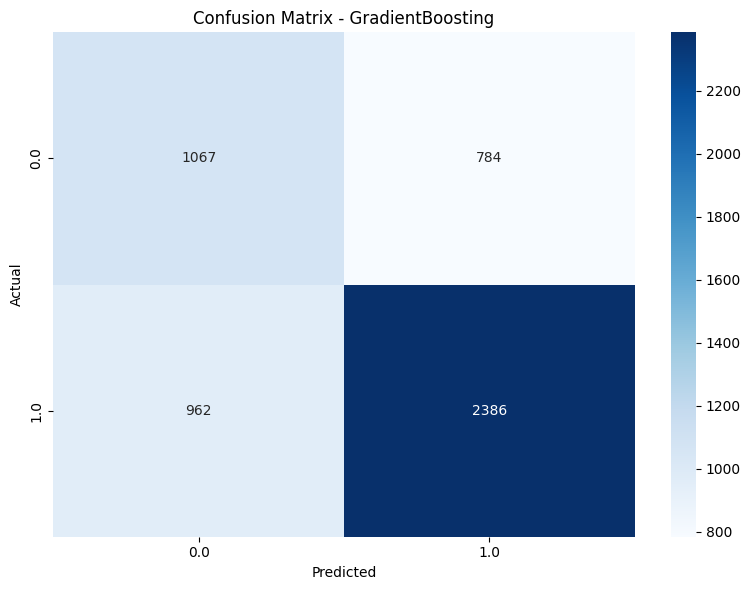


🚀 Training and Evaluating: XGBoost
⚠️ Could not compute AUC for XGBoost: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55      1851
         1.0       0.75      0.70      0.73      3348

    accuracy                           0.66      5199
   macro avg       0.64      0.64      0.64      5199
weighted avg       0.67      0.66      0.67      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.6611
📊 F1 Score (Macro): 0.6399
📊 F1 Score (Weighted): 0.6651
📊 Precision (PPV Macro): 0.6381
📊 NPV (Macro): 0.6381
📊 Sensitivity (Recall Macro): 0.6447
📊 Specificity (Macro): 0.6447
📊 Cohen's Kappa: 0.2814
📊 Matthews Corr Coef: 0.2827
📊 Balanced Accuracy: 0.6447


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:11:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


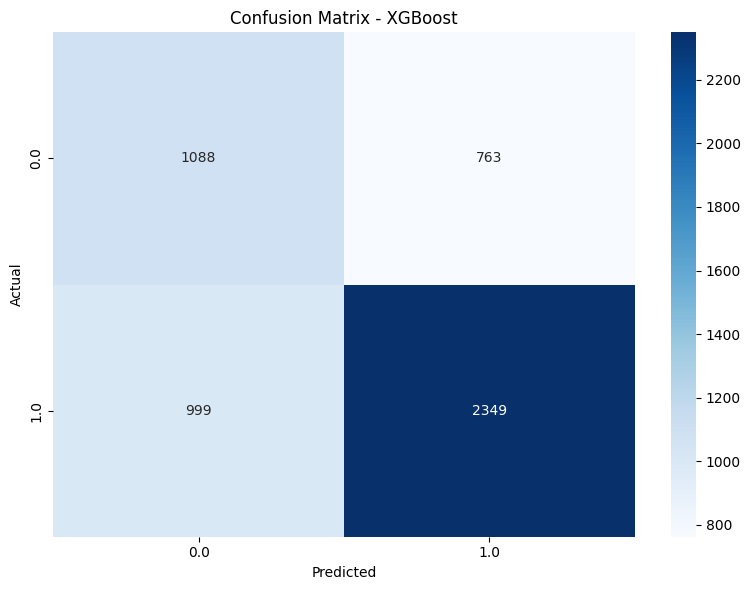


🚀 Training and Evaluating: ElasticNetLogistic


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


⚠️ Could not compute AUC for ElasticNetLogistic: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.73      0.53      1851
         1.0       0.75      0.44      0.55      3348

    accuracy                           0.54      5199
   macro avg       0.58      0.59      0.54      5199
weighted avg       0.63      0.54      0.55      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.5438
📊 F1 Score (Macro): 0.5435
📊 F1 Score (Weighted): 0.5464
📊 Precision (PPV Macro): 0.5838
📊 NPV (Macro): 0.5838
📊 Sensitivity (Recall Macro): 0.5860
📊 Specificity (Macro): 0.5860
📊 Cohen's Kappa: 0.1473
📊 Matthews Corr Coef: 0.1698
📊 Balanced Accuracy: 0.5860


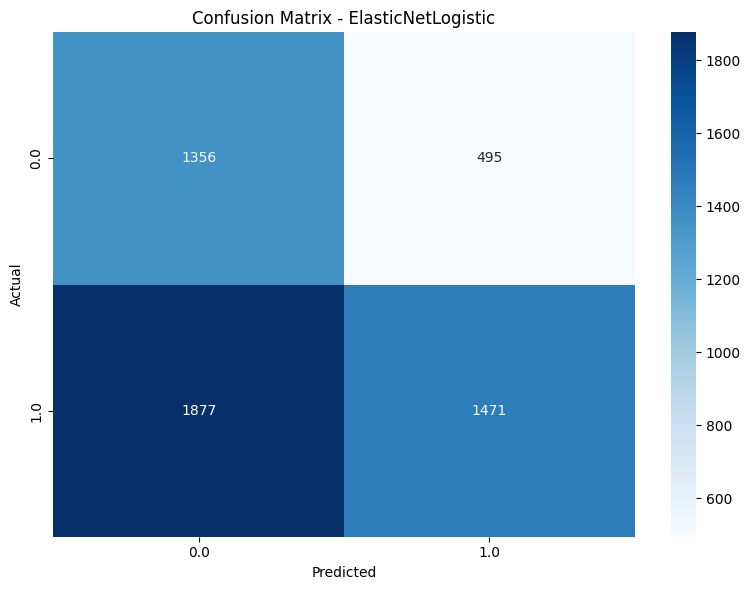


🚀 Training and Evaluating: LogisticRegression


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


⚠️ Could not compute AUC for LogisticRegression: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.73      0.53      1851
         1.0       0.75      0.44      0.55      3348

    accuracy                           0.54      5199
   macro avg       0.58      0.58      0.54      5199
weighted avg       0.63      0.54      0.55      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.5432
📊 F1 Score (Macro): 0.5429
📊 F1 Score (Weighted): 0.5461
📊 Precision (PPV Macro): 0.5825
📊 NPV (Macro): 0.5825
📊 Sensitivity (Recall Macro): 0.5848
📊 Specificity (Macro): 0.5848
📊 Cohen's Kappa: 0.1455
📊 Matthews Corr Coef: 0.1673
📊 Balanced Accuracy: 0.5848


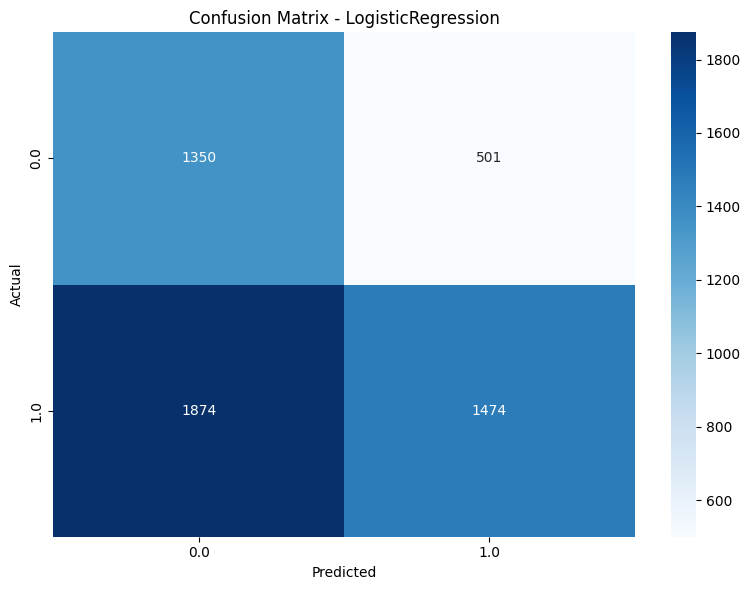


🚀 Training and Evaluating: RidgeClassifier
⚠️ Could not compute AUC for RidgeClassifier: 'RidgeClassifier' object has no attribute 'predict_proba'
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.73      0.53      1851
         1.0       0.75      0.44      0.56      3348

    accuracy                           0.55      5199
   macro avg       0.58      0.59      0.54      5199
weighted avg       0.63      0.55      0.55      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.5453
📊 F1 Score (Macro): 0.5450
📊 F1 Score (Weighted): 0.5484
📊 Precision (PPV Macro): 0.5840
📊 NPV (Macro): 0.5840
📊 Sensitivity (Recall Macro): 0.5864
📊 Specificity (Macro): 0.5864
📊 Cohen's Kappa: 0.1485
📊 Matthews Corr Coef: 0.1704
📊 Balanced Accuracy: 0.5864


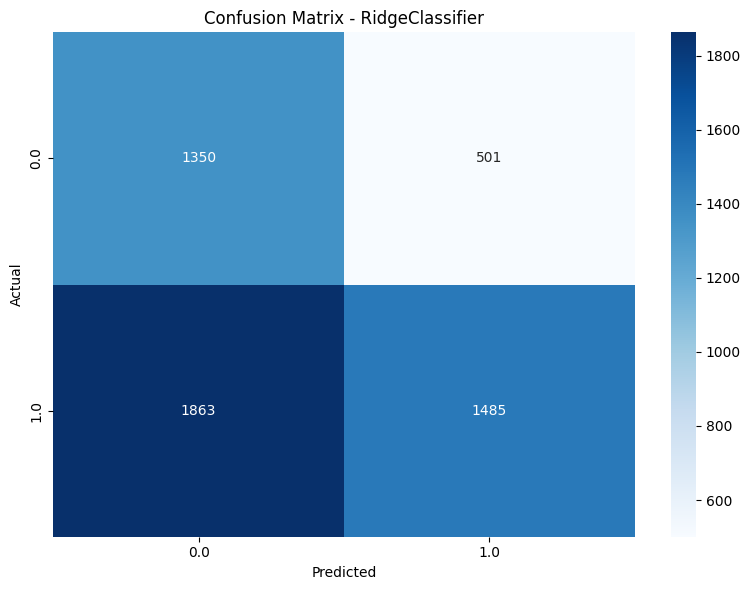


🚀 Training and Evaluating: SGDClassifier
⚠️ Could not compute AUC for SGDClassifier: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      1.00      0.52      1851
         1.0       0.00      0.00      0.00      3348

    accuracy                           0.36      5199
   macro avg       0.18      0.50      0.26      5199
weighted avg       0.13      0.36      0.19      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.3556
📊 F1 Score (Macro): 0.2623
📊 F1 Score (Weighted): 0.1868
📊 Precision (PPV Macro): 0.1779
📊 NPV (Macro): 0.1779
📊 Sensitivity (Recall Macro): 0.4995
📊 Specificity (Macro): 0.4995
📊 Cohen's Kappa: -0.0008
📊 Matthews Corr Coef: -0.0264
📊 Balanced Accuracy: 0.4995


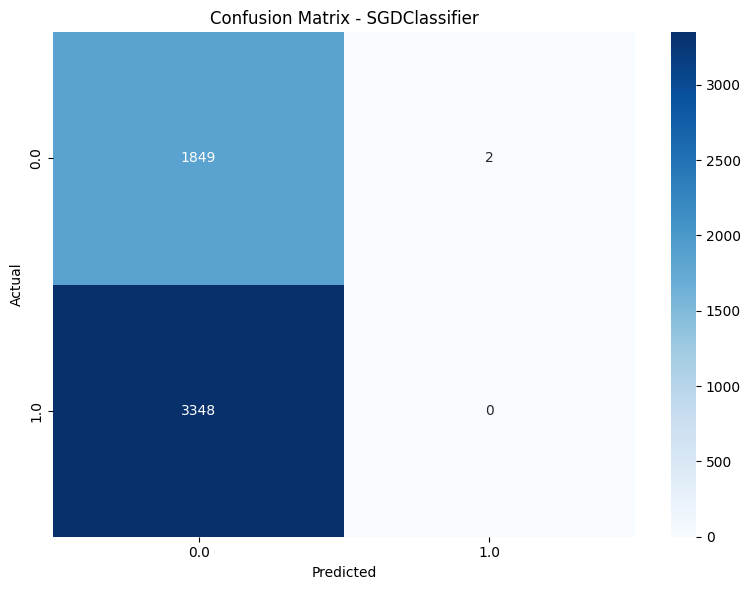


🚀 Training and Evaluating: DecisionTree
⚠️ Could not compute AUC for DecisionTree: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.50      0.46      1851
         1.0       0.69      0.62      0.66      3348

    accuracy                           0.58      5199
   macro avg       0.56      0.56      0.56      5199
weighted avg       0.60      0.58      0.59      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.5805
📊 F1 Score (Macro): 0.5589
📊 F1 Score (Weighted): 0.5870
📊 Precision (PPV Macro): 0.5597
📊 NPV (Macro): 0.5597
📊 Sensitivity (Recall Macro): 0.5635
📊 Specificity (Macro): 0.5635
📊 Cohen's Kappa: 0.1219
📊 Matthews Corr Coef: 0.1232
📊 Balanced Accuracy: 0.5635


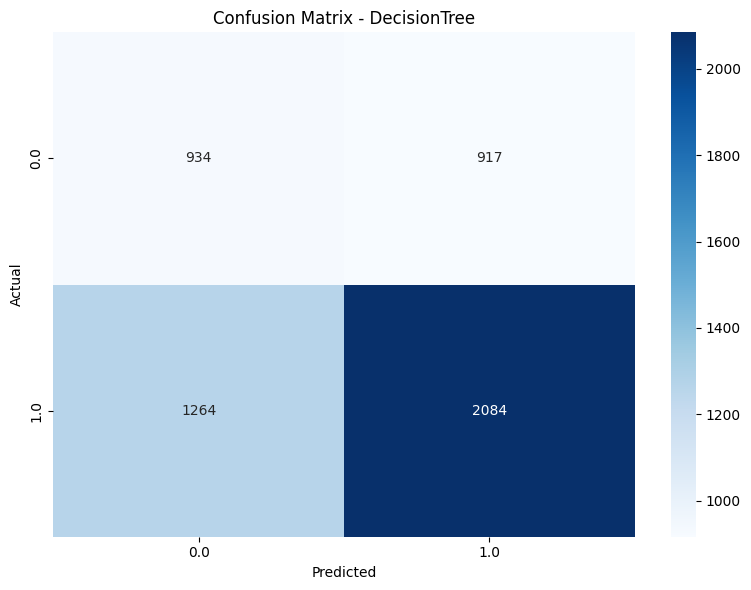


🚀 Training and Evaluating: RandomForest
⚠️ Could not compute AUC for RandomForest: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.59      0.55      1851
         1.0       0.75      0.68      0.72      3348

    accuracy                           0.65      5199
   macro avg       0.63      0.64      0.63      5199
weighted avg       0.66      0.65      0.65      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.6499
📊 F1 Score (Macro): 0.6306
📊 F1 Score (Weighted): 0.6549
📊 Precision (PPV Macro): 0.6292
📊 NPV (Macro): 0.6292
📊 Sensitivity (Recall Macro): 0.6369
📊 Specificity (Macro): 0.6369
📊 Cohen's Kappa: 0.2640
📊 Matthews Corr Coef: 0.2660
📊 Balanced Accuracy: 0.6369


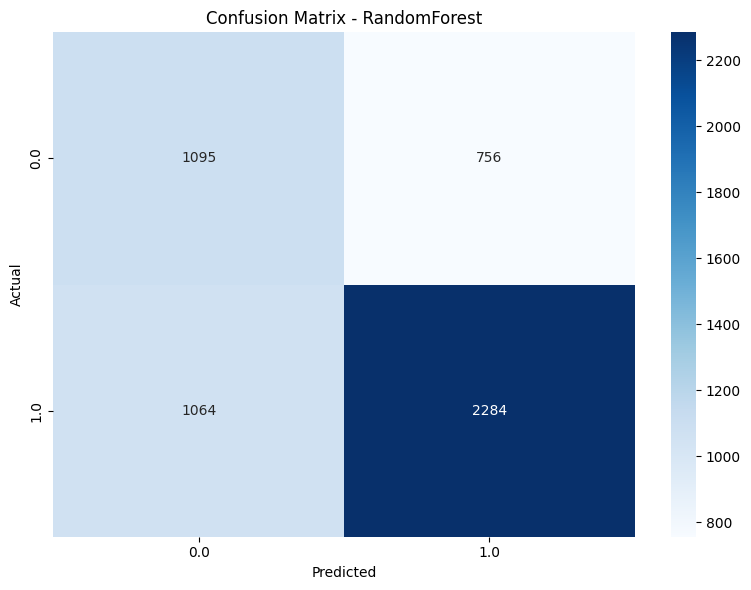


🚀 Training and Evaluating: AdaBoost
⚠️ Could not compute AUC for AdaBoost: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.63      0.55      1851
         1.0       0.76      0.64      0.69      3348

    accuracy                           0.64      5199
   macro avg       0.62      0.63      0.62      5199
weighted avg       0.66      0.64      0.64      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.6353
📊 F1 Score (Macro): 0.6224
📊 F1 Score (Weighted): 0.6425
📊 Precision (PPV Macro): 0.6243
📊 NPV (Macro): 0.6243
📊 Sensitivity (Recall Macro): 0.6346
📊 Specificity (Macro): 0.6346
📊 Cohen's Kappa: 0.2529
📊 Matthews Corr Coef: 0.2587
📊 Balanced Accuracy: 0.6346


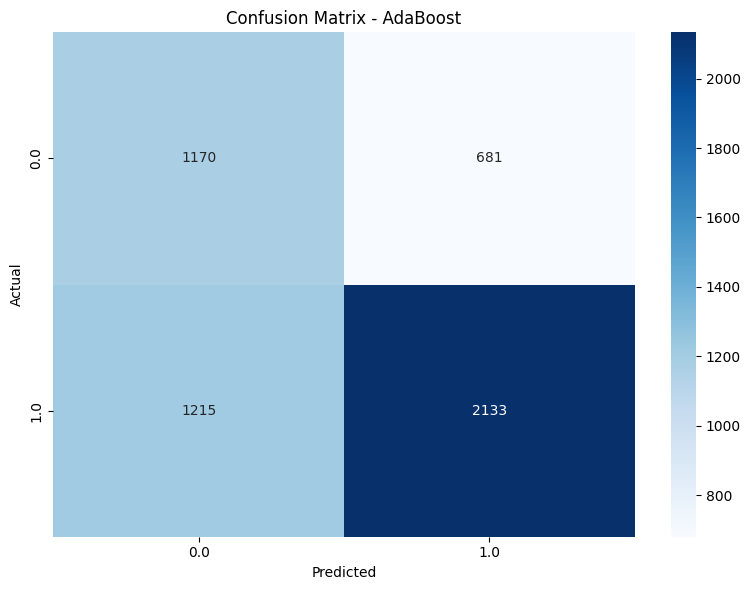


🚀 Training and Evaluating: KNN
⚠️ Could not compute AUC for KNN: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.41      0.60      0.48      1851
         1.0       0.70      0.52      0.60      3348

    accuracy                           0.55      5199
   macro avg       0.55      0.56      0.54      5199
weighted avg       0.60      0.55      0.56      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.5472
📊 F1 Score (Macro): 0.5405
📊 F1 Score (Weighted): 0.5565
📊 Precision (PPV Macro): 0.5538
📊 NPV (Macro): 0.5538
📊 Sensitivity (Recall Macro): 0.5586
📊 Specificity (Macro): 0.5586
📊 Cohen's Kappa: 0.1061
📊 Matthews Corr Coef: 0.1123
📊 Balanced Accuracy: 0.5586


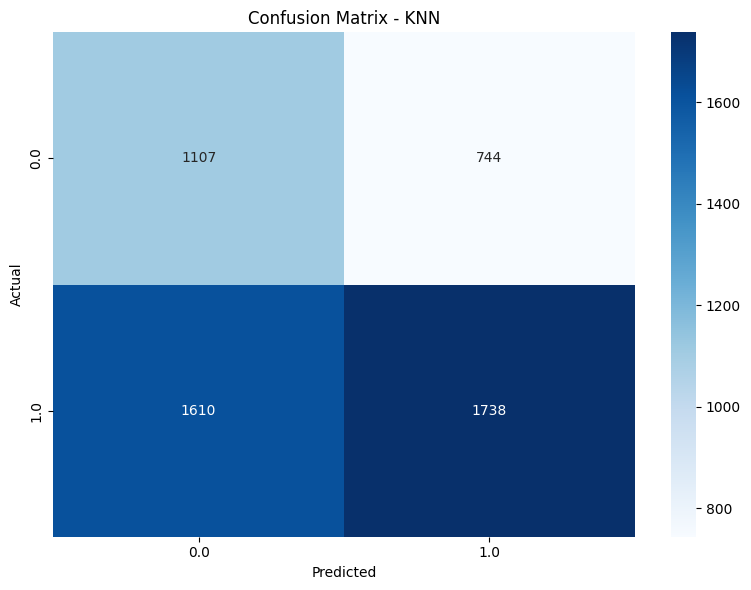


🚀 Training and Evaluating: LDA
⚠️ Could not compute AUC for LDA: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.73      0.53      1851
         1.0       0.75      0.44      0.56      3348

    accuracy                           0.55      5199
   macro avg       0.58      0.59      0.54      5199
weighted avg       0.63      0.55      0.55      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.5453
📊 F1 Score (Macro): 0.5450
📊 F1 Score (Weighted): 0.5484
📊 Precision (PPV Macro): 0.5840
📊 NPV (Macro): 0.5840
📊 Sensitivity (Recall Macro): 0.5864
📊 Specificity (Macro): 0.5864
📊 Cohen's Kappa: 0.1485
📊 Matthews Corr Coef: 0.1704
📊 Balanced Accuracy: 0.5864


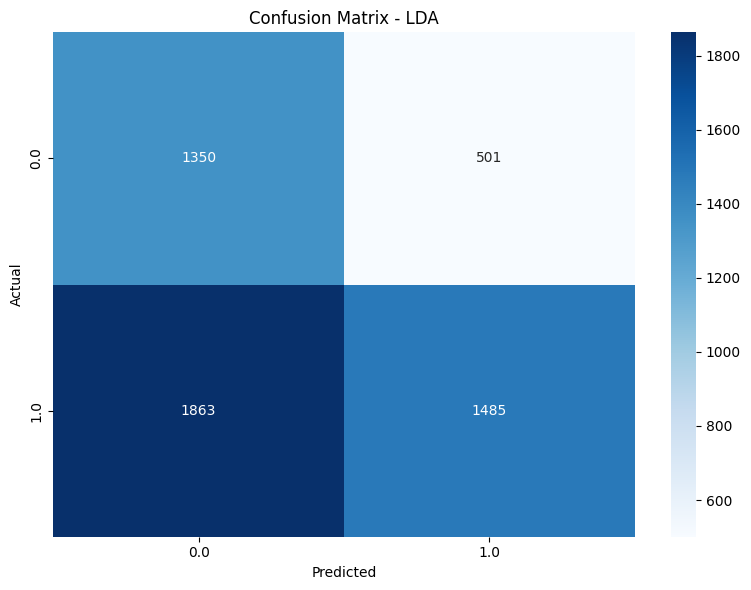


🚀 Training and Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 11226, number of negative: 11226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3776
[LightGBM] [Info] Number of data points in the train set: 22452, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
⚠️ Could not compute AUC for LightGBM: y should be a 1d array, got an array of shape (5199, 2) instead.
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.57      0.55      1851
         1.0       0.75      0.73      0.74      3348

    accuracy                           0.67      5199
   macro avg       0.64      0.65      0.65      5199
weighted avg       0.68      0.67      0.67      5199

📊 AUC (Macro): nan
📊 Accuracy: 0.6707
📊 F1 Score (Macro): 0.6456
📊 F

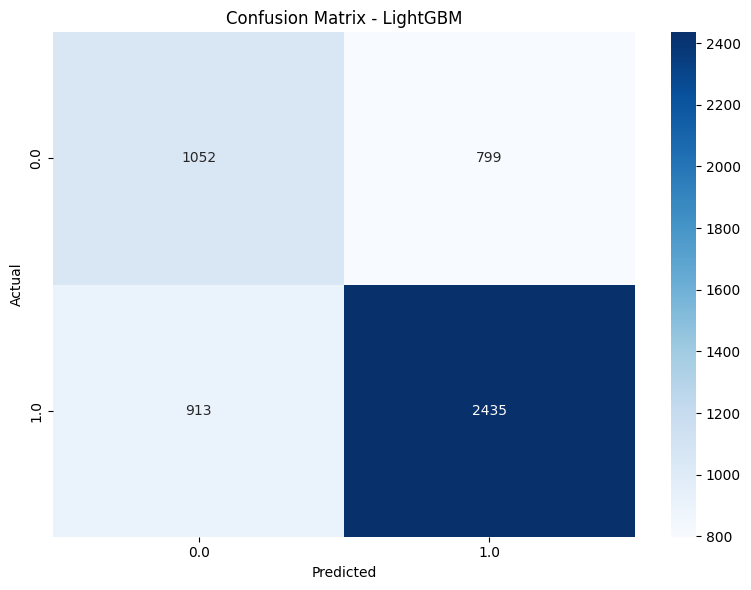

✅ Metrics exported to 'model06062025.csv'


In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import mord

from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score,
    confusion_matrix, classification_report,
    accuracy_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
)

# Assuming df is already loaded
# X = df.drop(columns=['label', 'YearStart'])
# y = df['label']

# Split dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.2, random_state=42
# )

# Apply SMOTE to training set only
smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("✅ After SMOTE:", Counter(y_train_resampled))

class MordOrdinalLogisticWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.model = mord.LogisticAT(alpha=self.alpha)
        self.classes_ = None

    def fit(self, X, y):
        self.model.fit(X, y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        return np.ones((n_samples, n_classes)) / n_classes

# Model list
models_to_test = {
    'GaussianNB': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(
        learning_rate=0.1, max_depth=5, min_samples_leaf=2,
        min_samples_split=5, n_estimators=100, random_state=42
    ),
    'XGBoost': XGBClassifier(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=7,
        n_estimators=50, subsample=1.0, use_label_encoder=False,
        eval_metric='mlogloss', random_state=42
    ),
    'ElasticNetLogistic': LogisticRegression(
        penalty='elasticnet', solver='saga', max_iter=1000,
        random_state=42, multi_class='multinomial', C=1.0, l1_ratio=1.0
    ),
    'LogisticRegression': LogisticRegression(
        penalty='l2', solver='lbfgs', max_iter=1000,
        random_state=42, multi_class='auto'
    ),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    #'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'LightGBM': LGBMClassifier(random_state=42),
    #'OrdinalLogistic': MordOrdinalLogisticWrapper(alpha=1.0)
}


def calculate_npv_spe(cm):
    """
    Given confusion matrix cm, compute per-class NPV and Specificity.
    Returns:
      npv_per_class: list of NPV per class
      spe_per_class: list of Specificity per class
    """
    n_classes = cm.shape[0]
    npv_per_class = []
    spe_per_class = []
    for i in range(n_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = cm.sum() - (TP + FP + FN)
        
        npv = TN / (TN + FN) if (TN + FN) > 0 else 0
        spe = TN / (TN + FP) if (TN + FP) > 0 else 0
        
        npv_per_class.append(npv)
        spe_per_class.append(spe)
    return npv_per_class, spe_per_class

metrics_summary = []

for name, model in models_to_test.items():
    print(f"\n🚀 Training and Evaluating: {name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # For AUC we need predicted probabilities (some models might not have predict_proba)
    try:
        y_proba = model.predict_proba(X_test)
        # multiclass roc_auc with ovr and macro average
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except Exception as e:
        print(f"⚠️ Could not compute AUC for {name}: {e}")
        auc = np.nan
    
    # Basic metrics
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    precision_macro = precision_score(y_test, y_pred, average='macro')  # PPV
    recall_macro = recall_score(y_test, y_pred, average='macro')        # Sensitivity
    
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    # Confusion matrix and NPV, SPE
    cm = confusion_matrix(y_test, y_pred)
    npv_per_class, spe_per_class = calculate_npv_spe(cm)
    npv_macro = np.mean(npv_per_class)
    spe_macro = np.mean(spe_per_class)
    
    print("🔍 Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"📊 AUC (Macro): {auc:.4f}")
    print(f"📊 Accuracy: {acc:.4f}")
    print(f"📊 F1 Score (Macro): {f1_macro:.4f}")
    print(f"📊 F1 Score (Weighted): {f1_weighted:.4f}")
    print(f"📊 Precision (PPV Macro): {precision_macro:.4f}")
    print(f"📊 NPV (Macro): {npv_macro:.4f}")
    print(f"📊 Sensitivity (Recall Macro): {recall_macro:.4f}")
    print(f"📊 Specificity (Macro): {spe_macro:.4f}")
    print(f"📊 Cohen's Kappa: {kappa:.4f}")
    print(f"📊 Matthews Corr Coef: {mcc:.4f}")
    print(f"📊 Balanced Accuracy: {balanced_acc:.4f}")
    
    # Save metrics
    metrics_summary.append({
        "Model": name,
        "AUC": round(auc, 4),
        "Accuracy": round(acc, 4),
        "F1_Macro": round(f1_macro, 4),
        "F1_Weighted": round(f1_weighted, 4),
        "Precision_Macro": round(precision_macro, 4),
        "NPV_Macro": round(npv_macro, 4),
        "Sensitivity_Macro": round(recall_macro, 4),
        "Specificity_Macro": round(spe_macro, 4),
        "Cohen_Kappa": round(kappa, 4),
        "MCC": round(mcc, 4),
        "Balanced_Accuracy": round(balanced_acc, 4),
    })
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(metrics_summary)
results_df.to_csv("model06062025_v2.csv", index=False)
print("✅ Metrics exported to 'model06062025.csv'")


In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for LightGBM
lgbm_param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01,0.5],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [5, 10, 20]
}

# Initialize base model
lgbm_base = LGBMClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_base,
    param_grid=lgbm_param_grid,
    scoring='f1_macro',  # You can change this to 'accuracy', 'recall_weighted', etc.
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-resampled training data
grid_search_lgbm.fit(X_train_resampled, y_train_resampled)

# Best estimator
best_lgbm = grid_search_lgbm.best_estimator_
print("\n🏆 Best LGBM Parameters:", grid_search_lgbm.best_params_)

# Evaluate on test set
y_pred_lgbm = best_lgbm.predict(X_test)

print("🔍 Classification Report (Best LGBM):")
print(classification_report(y_test, y_pred_lgbm))

# Confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Best LGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

✅ After SMOTE: Counter({1.0: 11226, 0.0: 11226})
Training Hard Voting ensemble...
🔍 Classification Report (Hard Voting Ensemble):
              precision    recall  f1-score   support

         0.0       0.49      0.65      0.56      1851
         1.0       0.76      0.62      0.68      3348

    accuracy                           0.63      5199
   macro avg       0.62      0.63      0.62      5199
weighted avg       0.66      0.63      0.64      5199



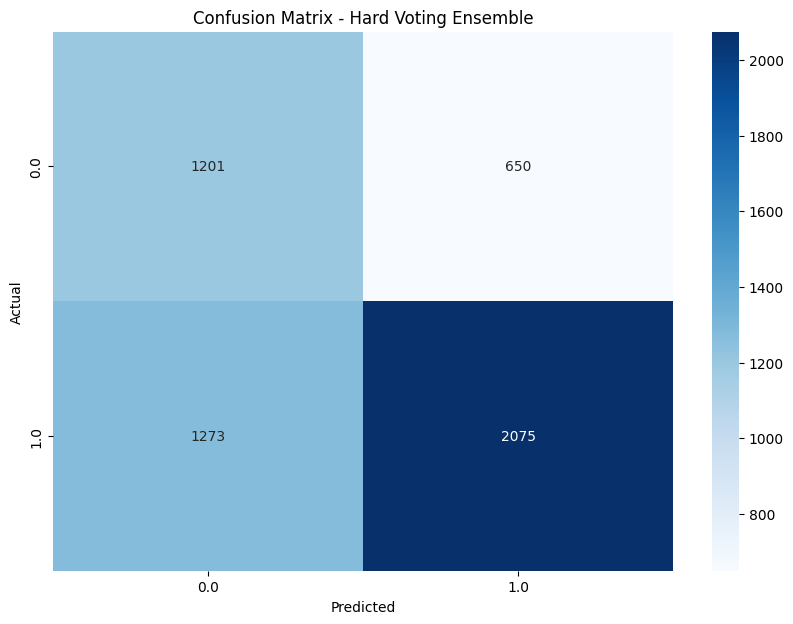

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("✅ After SMOTE:", Counter(y_train_resampled))

# Define base models
base_models = [
    #('nb1', GaussianNB(var_smoothing=1e-09)),
    # ('gb', GradientBoostingClassifier(
    #     learning_rate=0.1,
    #     max_depth=5,
    #     min_samples_leaf=2,
    #     min_samples_split=5,
    #     n_estimators=100,
    #     random_state=42
    # )),
    ('elas', LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=1000,
        random_state=42,
        multi_class='multinomial',
        C=1.0,
        l1_ratio=1.0
    )),
    ('xg', XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=7,
        n_estimators=50,
        subsample=1.0,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )),
    ('lightbm',LGBMClassifier(random_state=42)),
    ('ElasticNetLogistic', LogisticRegression(
        penalty='elasticnet', solver='saga', max_iter=1000,
        random_state=42, multi_class='multinomial', C=1.0, l1_ratio=1.0
    )),
    ('SVM', SVC(kernel='rbf', probability=True, random_state=42)),
]
# base_models = {
#     'GaussianNB': GaussianNB(),
#     'GradientBoosting': GradientBoostingClassifier(
#         learning_rate=0.1, max_depth=5, min_samples_leaf=2,
#         min_samples_split=5, n_estimators=100, random_state=42
#     ),
#     'XGBoost': XGBClassifier(
#         colsample_bytree=1.0, learning_rate=0.1, max_depth=7,
#         n_estimators=50, subsample=1.0, use_label_encoder=False,
#         eval_metric='mlogloss', random_state=42
#     ),
#     'ElasticNetLogistic': LogisticRegression(
#         penalty='elasticnet', solver='saga', max_iter=1000,
#         random_state=42, multi_class='multinomial', C=1.0, l1_ratio=1.0
#     ),
#     'LogisticRegression': LogisticRegression(
#         penalty='l2', solver='lbfgs', max_iter=1000,
#         random_state=42, multi_class='auto'
#     ),
#     'RidgeClassifier': RidgeClassifier(random_state=42),
#     'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42),
#     'DecisionTree': DecisionTreeClassifier(random_state=42),
#     'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
#     'KNN': KNeighborsClassifier(n_neighbors=5),
#     #'SVM': SVC(kernel='rbf', probability=True, random_state=42),
#     'LDA': LinearDiscriminantAnalysis(),
#     'LightGBM': LGBMClassifier(random_state=42),
#     #'OrdinalLogistic': MordOrdinalLogisticWrapper(alpha=1.0)
# }

# Create Voting Classifier
voting_model = VotingClassifier(
    estimators=base_models,
    voting='soft',
    n_jobs=-1
)

# Train Voting Classifier
print("Training Hard Voting ensemble...")
voting_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_voting = voting_model.predict(X_test)

# Evaluation
print("🔍 Classification Report (Hard Voting Ensemble):")
print(classification_report(y_test, y_pred_voting))

# Confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Hard Voting Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ After SMOTE: Counter({1.0: 11226, 0.0: 11226})
Training Class-Specific Expert Stacking Model...
🔍 Classification Report (Class-Aware Stacking):
              precision    recall  f1-score   support

         0.0       0.49      0.65      0.56      1851
         1.0       0.76      0.62      0.68      3348

    accuracy                           0.63      5199
   macro avg       0.63      0.64      0.62      5199
weighted avg       0.66      0.63      0.64      5199



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


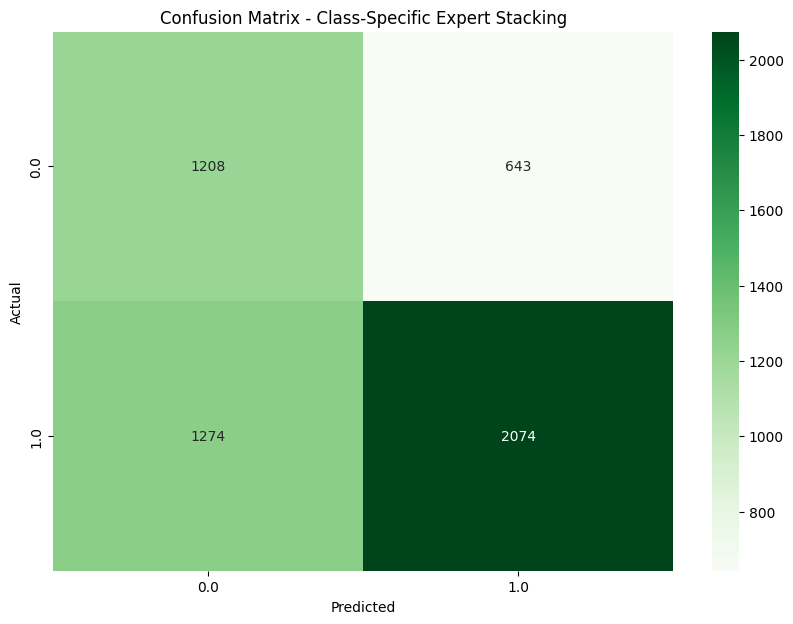

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis



# Load your data
# df = pd.read_csv("your_data.csv")
# X = df.drop("target", axis=1)
# y = df["target"]

# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("✅ After SMOTE:", Counter(y_train_resampled))

# Base models
base_models = [
    ('gb', GradientBoostingClassifier(
        learning_rate=0.1,
        max_depth=5,
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=100,
        random_state=42
    )),  # good at class 1
    ('xg', XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=7,
        n_estimators=50,
        subsample=1.0,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )),
     ('nb', GaussianNB()), 
]

# Meta model: learns when to trust which base model
meta_model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=1000,
    random_state=42,
    multi_class='multinomial',
    C=1.0,
    l1_ratio=1.0
)

# Create stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# Train
print("Training Class-Specific Expert Stacking Model...")
stacking_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluation
print("🔍 Classification Report (Class-Aware Stacking):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Class-Specific Expert Stacking")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [107]:
df_train = pd.read_csv(r"../../data/final/pca/processed_train.csv")
df_test = pd.read_csv(r"../../data/final/pca/processed_test.csv")

In [108]:
# 1. Combine train and test sets
df_fulled = pd.concat([df_train, df_test])
df_fulled['label'] = df_fulled['label'].apply(lambda x: 0 if x == 2 else x)
df_fulled = df_fulled[df_fulled['milk_consumption']<=3]

In [109]:
df_fulled.columns

Index(['Gender', 'Age', 'Race', 'BMI', 'WaistCircumference', 'Hba1c',
       'VitaminD', 'milk_consumption', 'label', 'YearStart', 'Blood_PC1',
       'Blood_PC2', 'SEQN', 'FastingGlucose', 'CreatinineUmol'],
      dtype='object')

In [110]:
remove_columns = [
    'VitaminD', 
]

df_fulled.drop(columns=remove_columns,inplace=True)
df_fulled.columns

Index(['Gender', 'Age', 'Race', 'BMI', 'WaistCircumference', 'Hba1c',
       'milk_consumption', 'label', 'YearStart', 'Blood_PC1', 'Blood_PC2',
       'SEQN', 'FastingGlucose', 'CreatinineUmol'],
      dtype='object')


🚀 Training and Evaluating: GaussianNB
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.55      0.49       370
         1.0       0.71      0.62      0.66       670

    accuracy                           0.60      1040
   macro avg       0.58      0.59      0.58      1040
weighted avg       0.62      0.60      0.60      1040



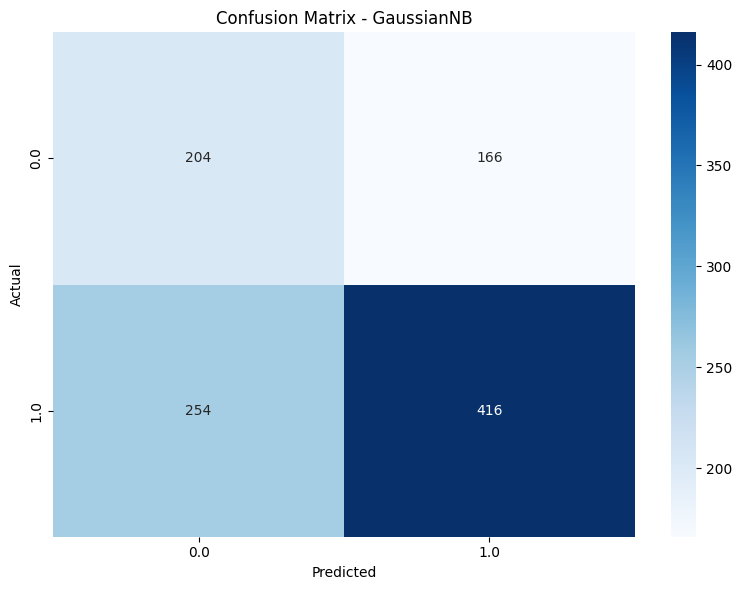


🚀 Training and Evaluating: GradientBoosting
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.44      0.50       370
         1.0       0.73      0.82      0.77       670

    accuracy                           0.68      1040
   macro avg       0.65      0.63      0.63      1040
weighted avg       0.67      0.68      0.67      1040



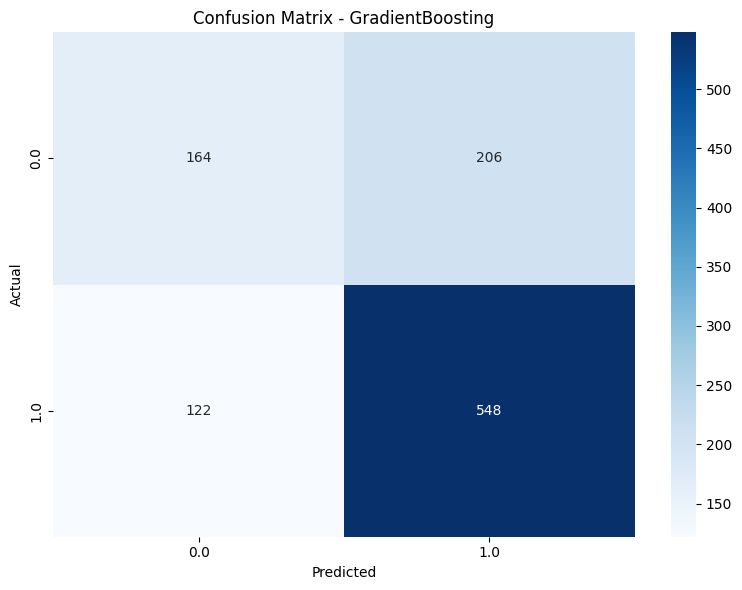


🚀 Training and Evaluating: XGBoost
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.45      0.50       370
         1.0       0.73      0.82      0.77       670

    accuracy                           0.69      1040
   macro avg       0.65      0.63      0.64      1040
weighted avg       0.68      0.69      0.68      1040



c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


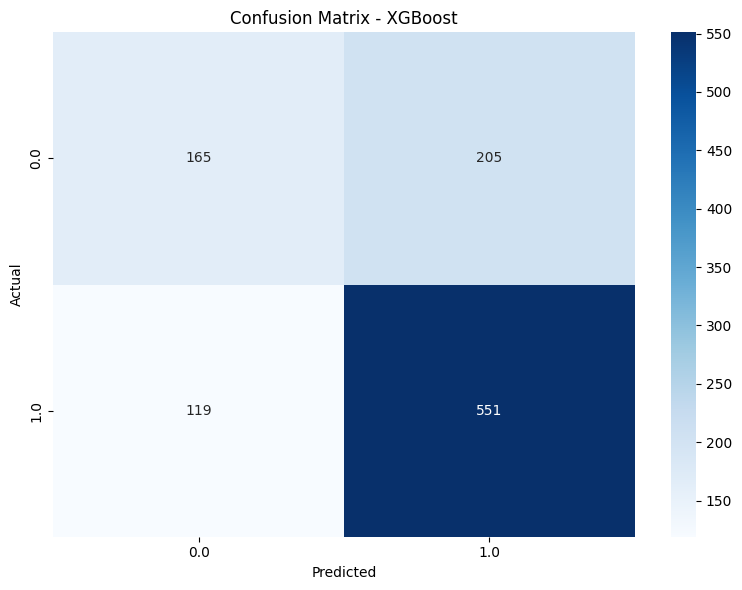


🚀 Training and Evaluating: ElasticNetLogistic


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.58      0.49       370
         1.0       0.71      0.57      0.63       670

    accuracy                           0.57      1040
   macro avg       0.57      0.57      0.56      1040
weighted avg       0.61      0.57      0.58      1040



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


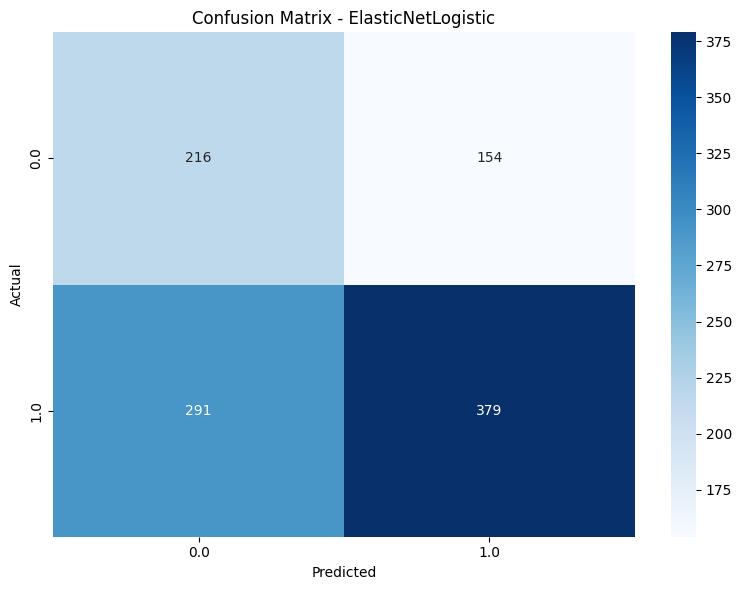

c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🚀 Training and Evaluating: LogisticRegression
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.59      0.51       370
         1.0       0.73      0.61      0.67       670

    accuracy                           0.60      1040
   macro avg       0.59      0.60      0.59      1040
weighted avg       0.63      0.60      0.61      1040



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


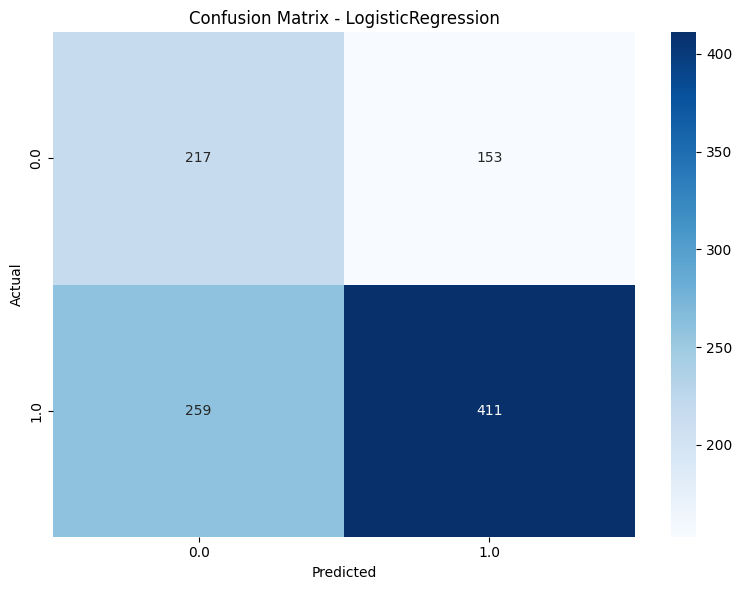


🚀 Training and Evaluating: RidgeClassifier
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.56      0.50       370
         1.0       0.72      0.62      0.66       670

    accuracy                           0.60      1040
   macro avg       0.58      0.59      0.58      1040
weighted avg       0.62      0.60      0.61      1040



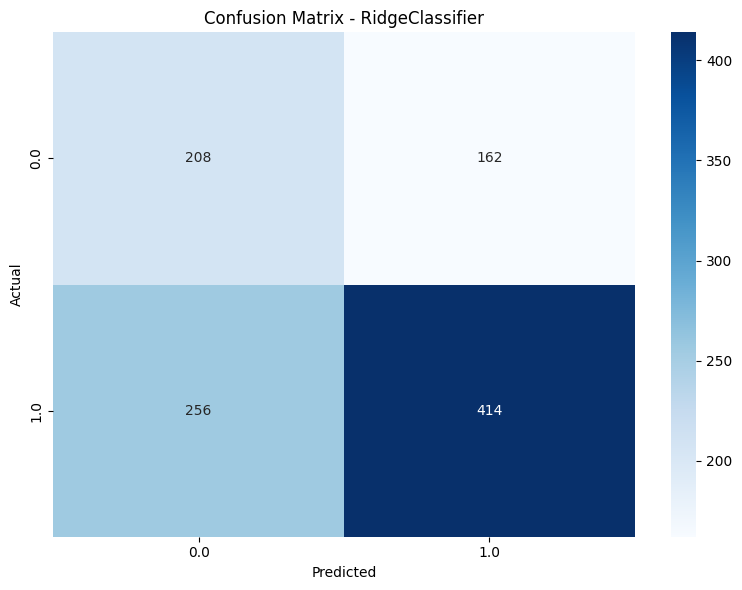


🚀 Training and Evaluating: SGDClassifier
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      1.00      0.52       370
         1.0       0.00      0.00      0.00       670

    accuracy                           0.36      1040
   macro avg       0.18      0.50      0.26      1040
weighted avg       0.13      0.36      0.19      1040



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


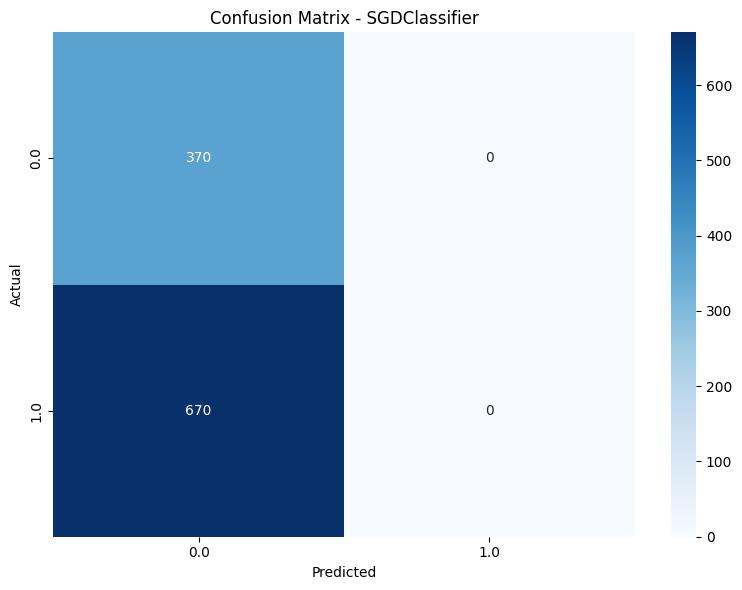


🚀 Training and Evaluating: DecisionTree
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.50      0.49       370
         1.0       0.72      0.70      0.71       670

    accuracy                           0.63      1040
   macro avg       0.60      0.60      0.60      1040
weighted avg       0.63      0.63      0.63      1040



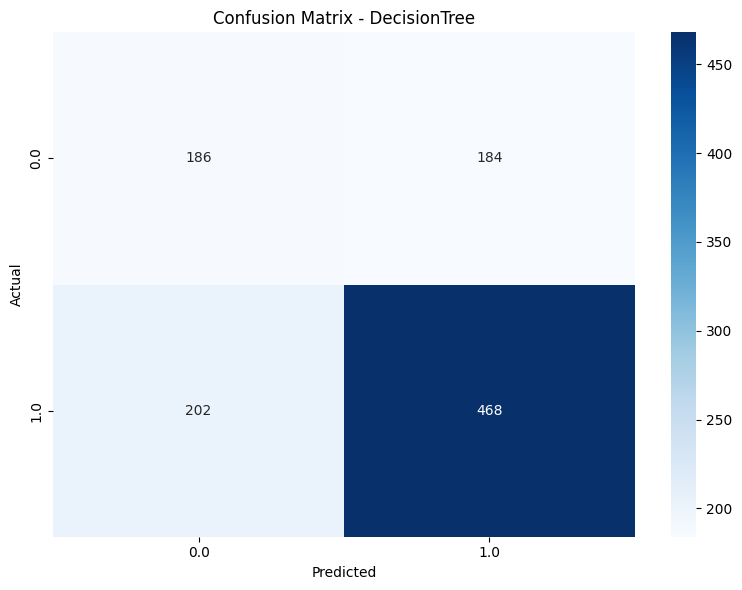


🚀 Training and Evaluating: RandomForest
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.45      0.50       370
         1.0       0.73      0.80      0.76       670

    accuracy                           0.68      1040
   macro avg       0.64      0.63      0.63      1040
weighted avg       0.67      0.68      0.67      1040



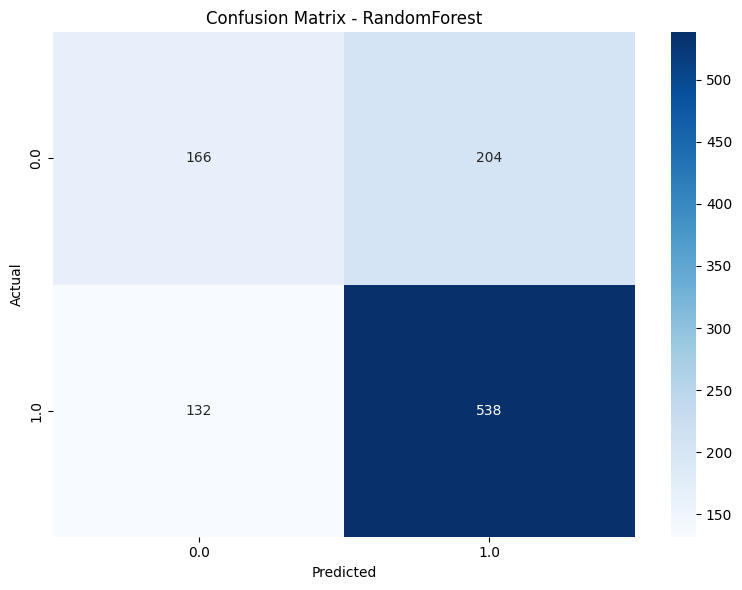


🚀 Training and Evaluating: AdaBoost
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.48      0.51       370
         1.0       0.73      0.77      0.75       670

    accuracy                           0.67      1040
   macro avg       0.63      0.63      0.63      1040
weighted avg       0.66      0.67      0.66      1040



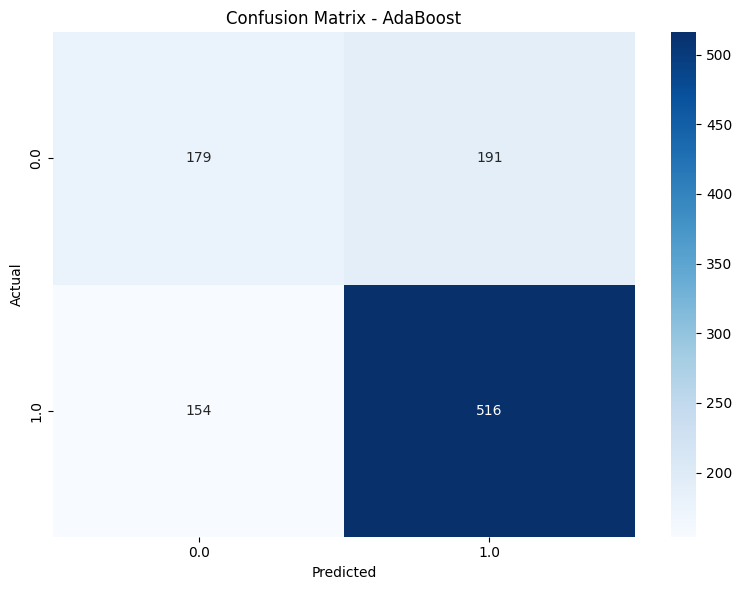


🚀 Training and Evaluating: KNN
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.35      0.43      0.38       370
         1.0       0.64      0.56      0.59       670

    accuracy                           0.51      1040
   macro avg       0.49      0.49      0.49      1040
weighted avg       0.53      0.51      0.52      1040



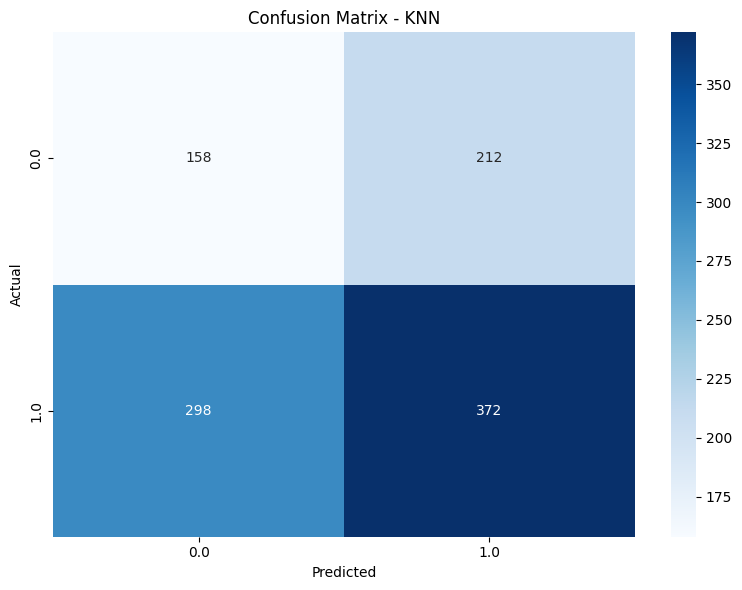


🚀 Training and Evaluating: SVM
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.35      0.41      0.37       370
         1.0       0.64      0.58      0.61       670

    accuracy                           0.52      1040
   macro avg       0.49      0.49      0.49      1040
weighted avg       0.53      0.52      0.52      1040



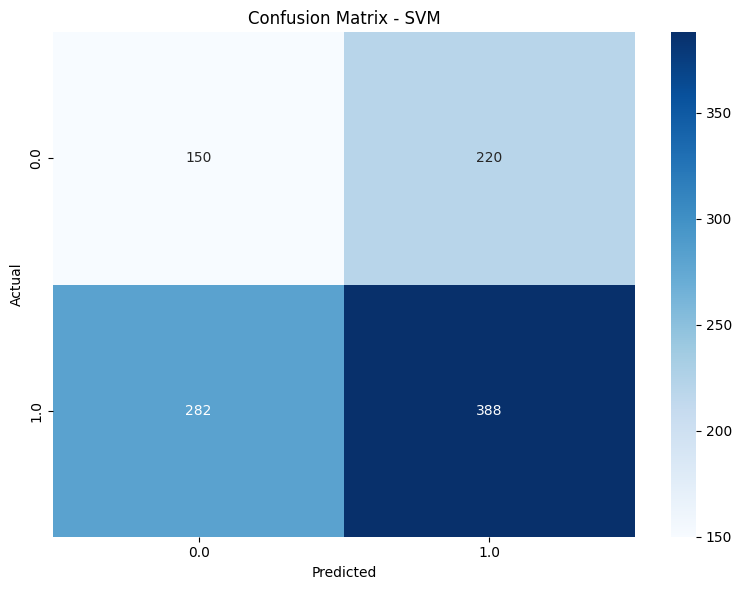


🚀 Training and Evaluating: LDA
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.56      0.50       370
         1.0       0.72      0.62      0.66       670

    accuracy                           0.60      1040
   macro avg       0.58      0.59      0.58      1040
weighted avg       0.62      0.60      0.61      1040



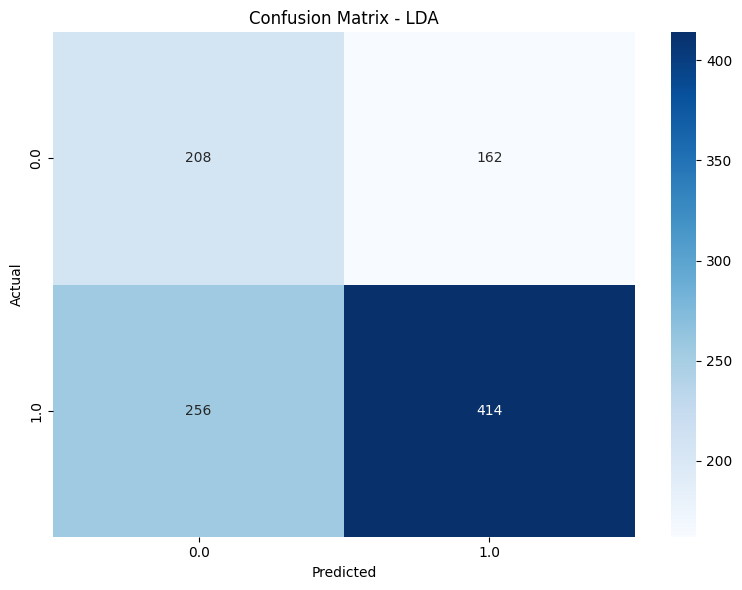


🚀 Training and Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 2678, number of negative: 2678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3061
[LightGBM] [Info] Number of data points in the train set: 5356, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.42      0.48       370
         1.0       0.72      0.82      0.76       670

    accuracy                           0.68      1040
   macro avg       0.64      0.62      0.62      1040
weighted avg       0.66      0.68      0.66      1040



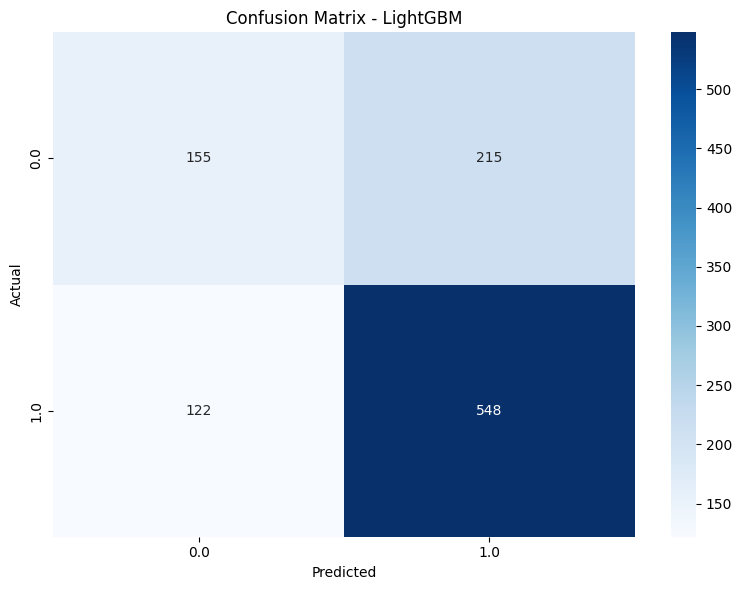

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin
import mord



df_fulled.dropna(inplace=True)
# 2. Split features and target
X = df_fulled.drop(columns=['label'])
y = df_fulled['label']


# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# 6. Define models
models_to_test = {
    'GaussianNB': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(
        learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5,
        n_estimators=100, random_state=42
    ),
    'XGBoost': XGBClassifier(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=7,
        n_estimators=50, subsample=1.0, use_label_encoder=False,
        eval_metric='mlogloss', random_state=42
    ),
    'ElasticNetLogistic': LogisticRegression(
        penalty='elasticnet', solver='saga', max_iter=1000,
        random_state=42, multi_class='multinomial', C=1.0, l1_ratio=1.0
    ),
    'LogisticRegression': LogisticRegression(
        penalty='l2', solver='lbfgs', max_iter=1000,
        random_state=42, multi_class='auto'
    ),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'LightGBM': LGBMClassifier(random_state=42),
}

# 7. Evaluate each model
for name, model in models_to_test.items():
    print(f"\n🚀 Training and Evaluating: {name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    print("🔍 Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



📘 Cross-validating model: GaussianNB

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.61      0.51      1851
         1.0       0.72      0.56      0.63      3348

    accuracy                           0.58      5199
   macro avg       0.58      0.59      0.57      5199
weighted avg       0.62      0.58      0.59      5199



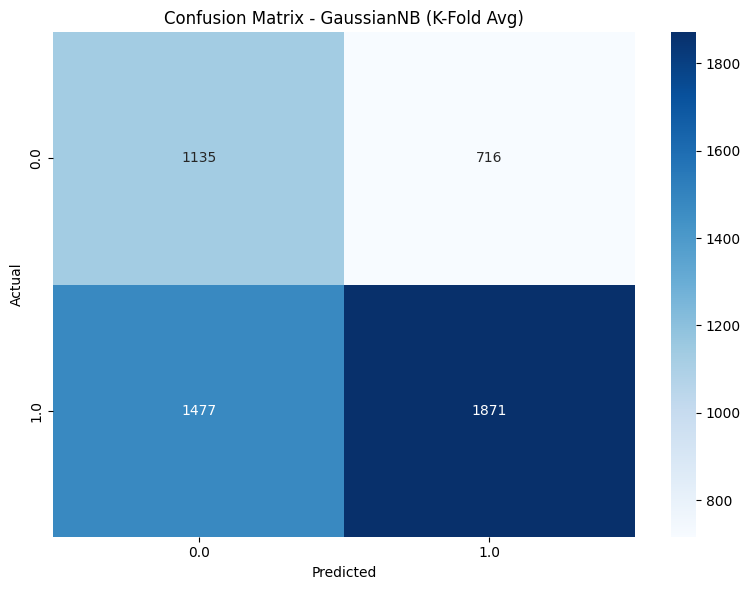


📘 Cross-validating model: GradientBoosting

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.46      0.52      1851
         1.0       0.74      0.83      0.78      3348

    accuracy                           0.70      5199
   macro avg       0.67      0.64      0.65      5199
weighted avg       0.69      0.70      0.69      5199



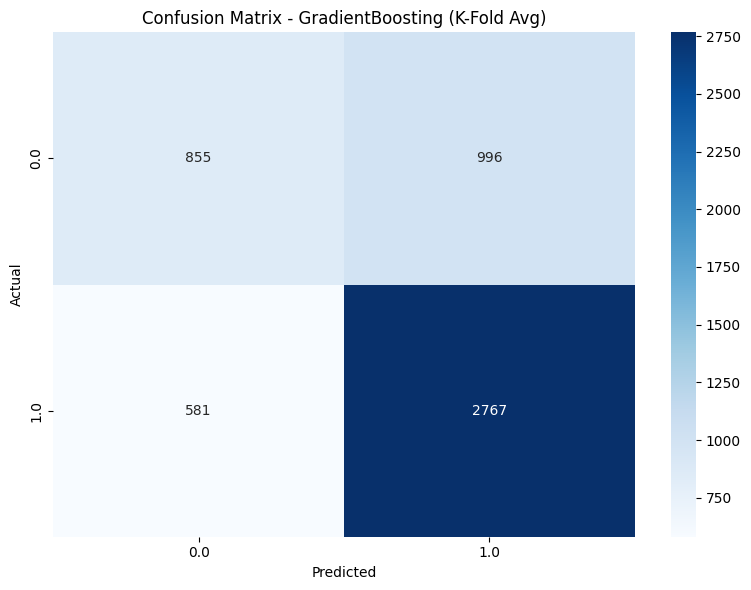


📘 Cross-validating model: XGBoost

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update


🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update


🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.45      0.51      1851
         1.0       0.73      0.82      0.77      3348

    accuracy                           0.69      5199
   macro avg       0.66      0.64      0.64      5199
weighted avg       0.68      0.69      0.68      5199



c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


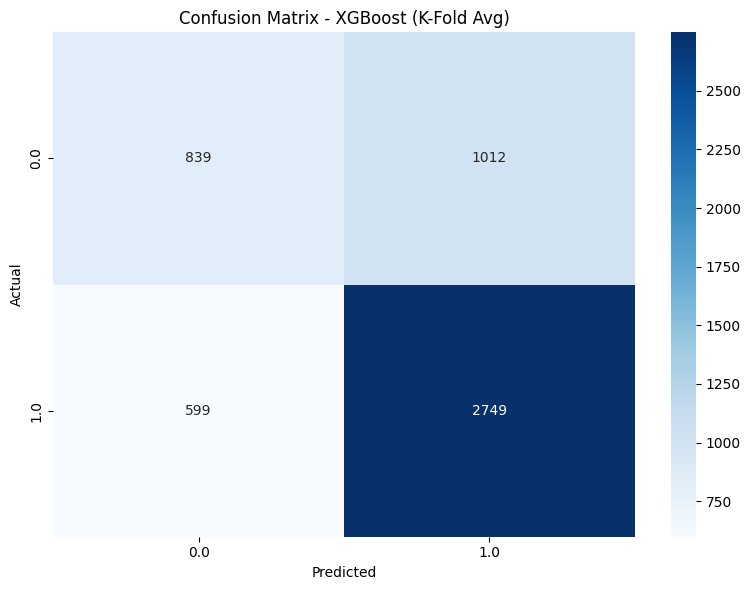


📘 Cross-validating model: ElasticNetLogistic

🔁 Fold 1/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 2/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 3/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 4/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 5/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 6/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 7/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 8/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 9/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.60      0.49      1851
         1.0       0.71      0.54      0.61      3348

    accuracy                           0.56      5199
   macro avg       0.56      0.57      0.55      5199
weighted avg       0.61      0.56      0.57      5199



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


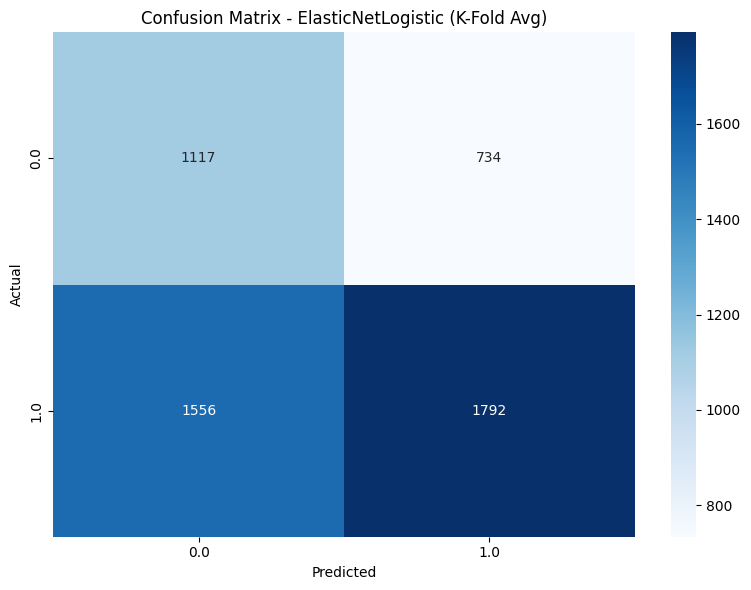

c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



📘 Cross-validating model: LogisticRegression

🔁 Fold 1/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 2/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 3/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 4/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 5/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 6/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 7/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 8/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 9/10


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.59      0.51      1851
         1.0       0.72      0.59      0.65      3348

    accuracy                           0.59      5199
   macro avg       0.58      0.59      0.58      5199
weighted avg       0.62      0.59      0.60      5199



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


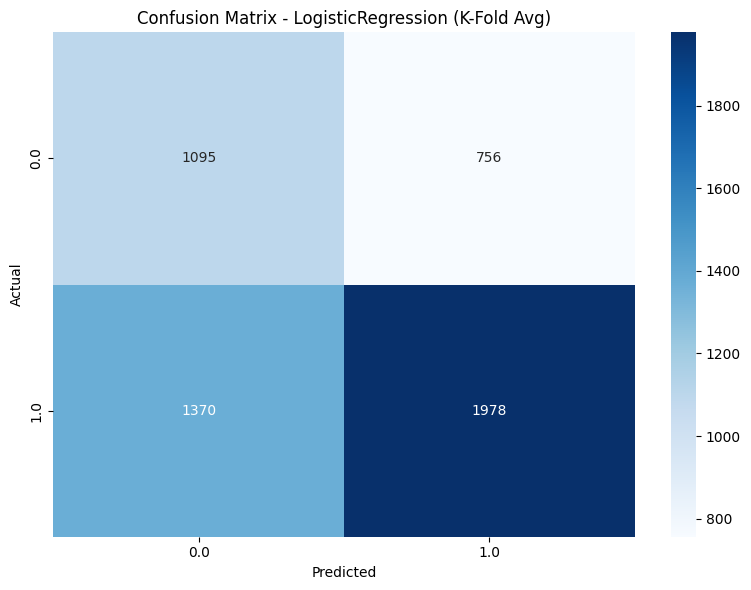


📘 Cross-validating model: RidgeClassifier

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.59      0.51      1851
         1.0       0.73      0.60      0.66      3348

    accuracy                           0.60      5199
   macro avg       0.59      0.60      0.58      5199
weighted avg       0.63      0.60      0.61      5199



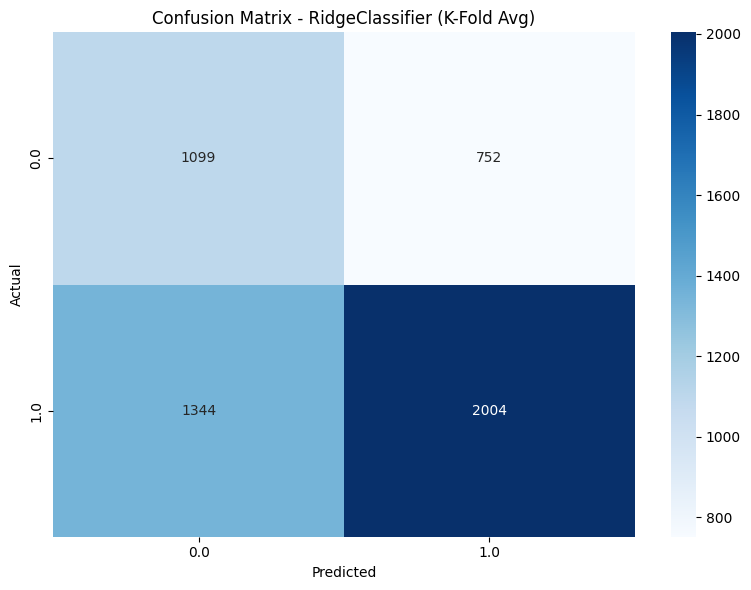


📘 Cross-validating model: SGDClassifier

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      0.70      0.47      1851
         1.0       0.64      0.30      0.41      3348

    accuracy                           0.44      5199
   macro avg       0.50      0.50      0.44      5199
weighted avg       0.54      0.44      0.43      5199



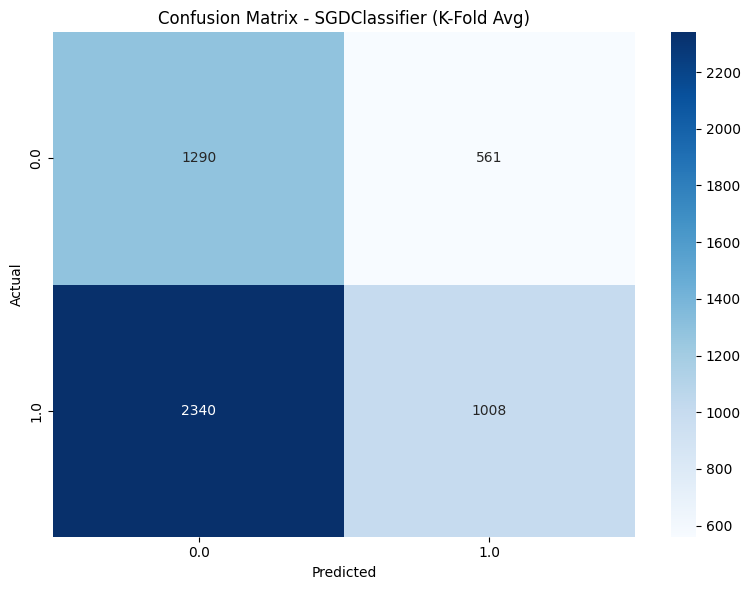


📘 Cross-validating model: DecisionTree

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.47      0.45      1851
         1.0       0.69      0.67      0.68      3348

    accuracy                           0.60      5199
   macro avg       0.57      0.57      0.57      5199
weighted avg       0.60      0.60      0.60      5199



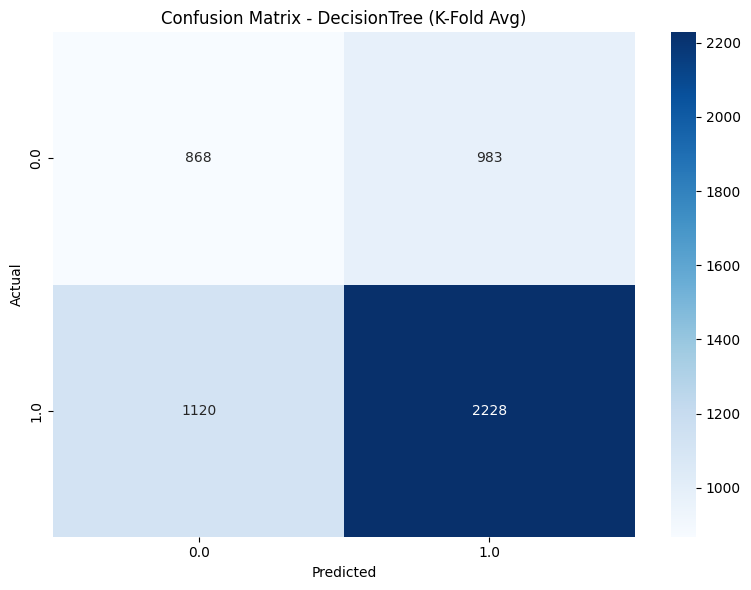


📘 Cross-validating model: RandomForest

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.46      0.51      1851
         1.0       0.73      0.80      0.76      3348

    accuracy                           0.68      5199
   macro avg       0.65      0.63      0.64      5199
weighted avg       0.67      0.68      0.67      5199



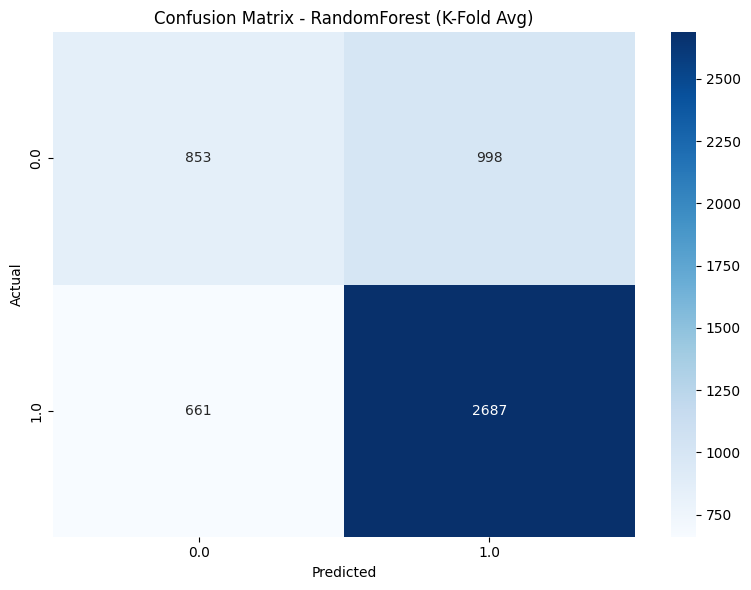


📘 Cross-validating model: AdaBoost

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.52      0.54      1851
         1.0       0.74      0.77      0.76      3348

    accuracy                           0.68      5199
   macro avg       0.65      0.65      0.65      5199
weighted avg       0.68      0.68      0.68      5199



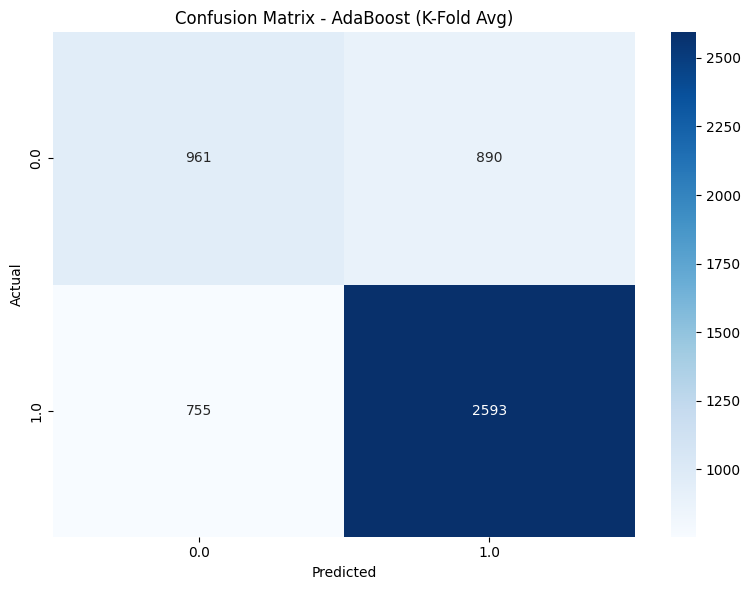


📘 Cross-validating model: KNN

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.49      0.42      1851
         1.0       0.66      0.54      0.60      3348

    accuracy                           0.52      5199
   macro avg       0.52      0.52      0.51      5199
weighted avg       0.56      0.52      0.53      5199



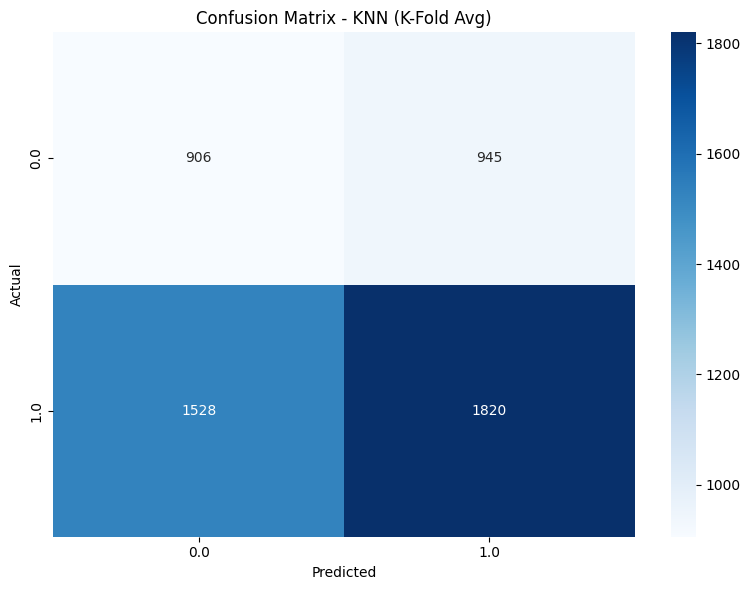


📘 Cross-validating model: SVM

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      0.52      0.42      1851
         1.0       0.64      0.48      0.55      3348

    accuracy                           0.49      5199
   macro avg       0.50      0.50      0.49      5199
weighted avg       0.54      0.49      0.51      5199



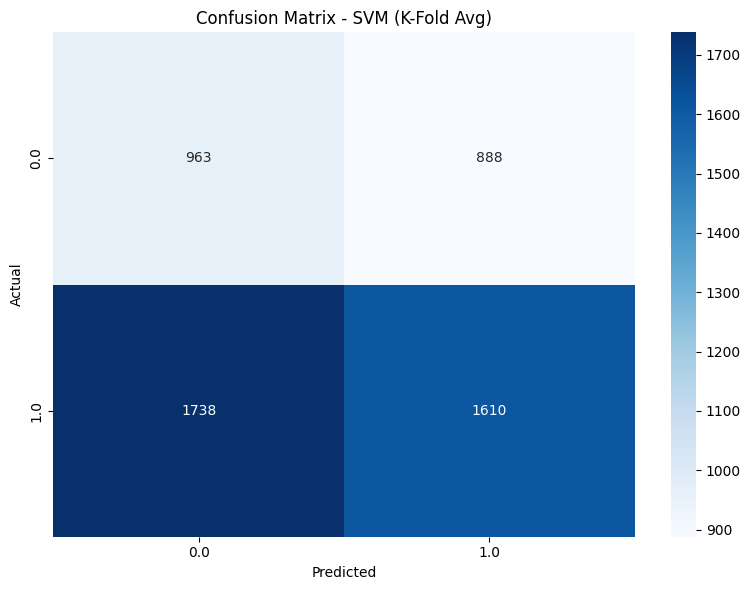


📘 Cross-validating model: LDA

🔁 Fold 1/10

🔁 Fold 2/10

🔁 Fold 3/10

🔁 Fold 4/10

🔁 Fold 5/10

🔁 Fold 6/10

🔁 Fold 7/10

🔁 Fold 8/10

🔁 Fold 9/10

🔁 Fold 10/10

📊 Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.59      0.51      1851
         1.0       0.73      0.60      0.66      3348

    accuracy                           0.60      5199
   macro avg       0.59      0.60      0.58      5199
weighted avg       0.63      0.60      0.61      5199



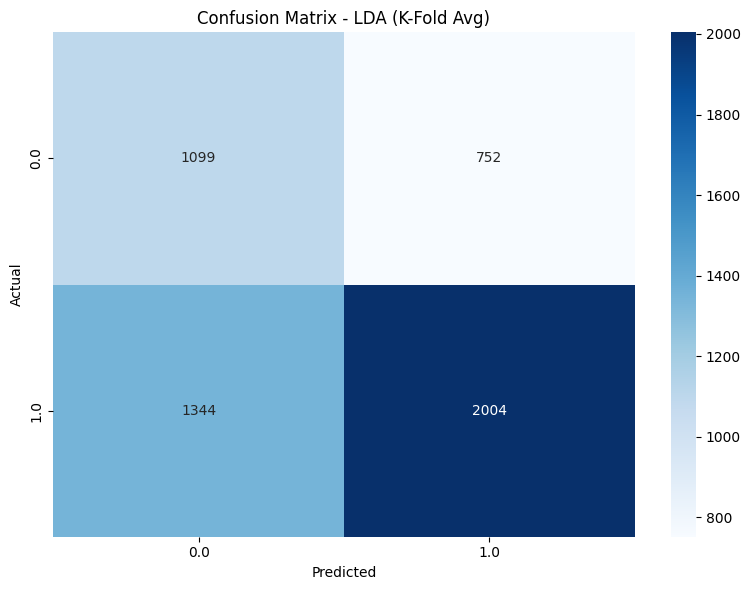


📘 Cross-validating model: LightGBM

🔁 Fold 1/10
[LightGBM] [Info] Number of positive: 3013, number of negative: 3013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 6026, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🔁 Fold 2/10
[LightGBM] [Info] Number of positive: 3013, number of negative: 3013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 6026, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🔁 Fold 3/10
[LightGBM] [Info] Number of positive: 3013, number of

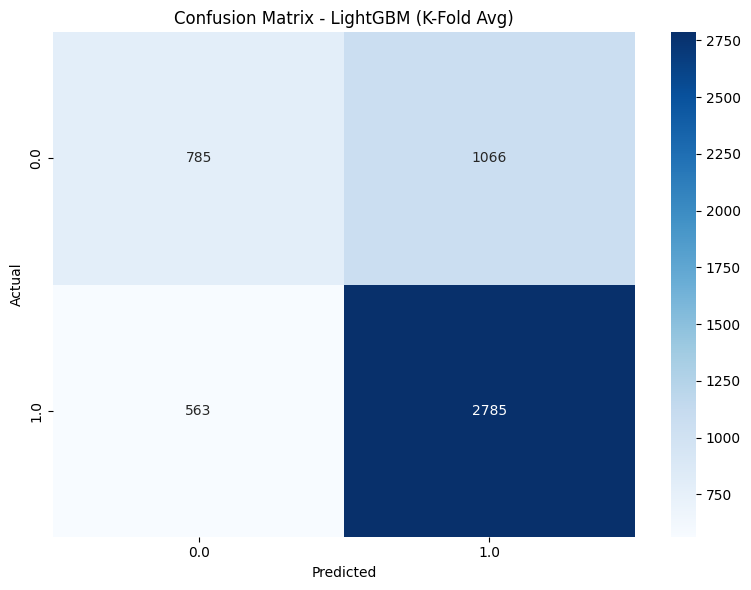

In [112]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up K-Fold
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize model scores
model_scores = {name: [] for name in models_to_test}

# Iterate over each model
for name, model in models_to_test.items():
    print(f"\n📘 Cross-validating model: {name}")
    all_preds = []
    all_trues = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"\n🔁 Fold {fold+1}/{k}")
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE to training fold
        smote = SMOTE(random_state=42, sampling_strategy='minority')
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Train the model
        model.fit(X_train_resampled, y_train_resampled)

        # Predict on test fold
        y_pred = model.predict(X_test_fold)

        # Store results
        all_preds.extend(y_pred)
        all_trues.extend(y_test_fold)

    # After K-folds, evaluate
    print("\n📊 Final Classification Report:")
    print(classification_report(all_trues, all_preds))

    cm = confusion_matrix(all_trues, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name} (K-Fold Avg)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
